## CAPSTONE Project - Telecom dataset

In [2]:
#!pip install mysql-connector-python

In [3]:
#!pip install folium

In [4]:
import mysql.connector as sqcon
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import seaborn as sns  
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Defining the function to plot the data on Map for latitude and longitude
def plot_on_map(data_to_map):
    center = [data_to_map.iloc[0]['latitude'], data_to_map.iloc[0]['longitude']]
    map_India = folium.Map(location=center, zoom_start=4)
    for index, phone_loc in data_to_map.iterrows():
        location = [phone_loc['latitude'], phone_loc['longitude']]
        folium.Marker(location, popup = f'City:{phone_loc["city"]}').add_to(map_India)
    return map_India

### Connect to SQL DB and retrieve data from tables into Dataframe

In [6]:
# Function to create SQL connection
def create_sql_conn():
    try:
        conn = sqcon.connect(user='student',
                              password='student',
                              host='cpanel.insaid.co',
                              database='Capstone1')
    except sqcon.Error as e:
        print("Error Creating database connection ", e)
    return conn


In [7]:
conn = create_sql_conn()
gender_age_train_df = pd.read_sql("SELECT * FROM gender_age_train", conn)
print(gender_age_train_df)

                 device_id gender  age   group
0     -8076087639492063270      M   35  M32-38
1     -2897161552818060146      M   35  M32-38
2     -8260683887967679142      M   35  M32-38
3     -4938849341048082022      M   30  M29-31
4       245133531816851882      M   30  M29-31
...                    ...    ...  ...     ...
74640  4682031842235089751      M   30  M29-31
74641 -9178703742877135986      M   30  M29-31
74642   180946546684162312      M   20    M22-
74643  1390702386071991851      M   37  M32-38
74644    89181010588227347      M   25  M23-26

[74645 rows x 4 columns]


In [8]:
phone_brand_device_model_df = pd.read_sql("SELECT * FROM phone_brand_device_model", conn)
print(phone_brand_device_model_df)

                 device_id phone_brand device_model
0      1877775838486905855        vivo          Y13
1     -3766087376657242966          小米         V183
2     -6238937574958215831        OPPO          R7s
3      8973197758510677470          三星        A368t
4     -2015528097870762664          小米      红米Note2
...                    ...         ...          ...
87721 -4961458925928574032          华为       荣耀畅玩4X
87722 -8819817317449262375          华为          荣耀6
87723 -3358291377416935026          华为        荣耀畅玩4
87724  3282788959750981633          小米         MI 2
87725  2491639413207286271          酷比           M1

[87726 rows x 3 columns]


In [9]:
conn.close()

### Read Event data from local drive

In [10]:
#events_data_df = pd.read_csv(r'C:\Users\User\Documents\INSAID DataScience\Data\events_data.csv')

In [11]:
# Reading the events data, which is store locally
# Assuming the events_data file is in the folder named data 
events_data_df = pd.read_csv('Data\events_data.csv', dtype={'device_id': np.str})
#events_data_df = pd.read_csv('data/events_data.csv') #, dtype={'device_id': np.str})

#### Basic Analysis on the Data

In [12]:
gender_age_train_df.head()

device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31

In [13]:
gender_age_train_df.describe(include='all')           

device_id gender           age   group
count   7.464500e+04  74645  74645.000000   74645
unique           NaN      2           NaN      12
top              NaN      M           NaN  M23-26
freq             NaN  47904           NaN    9605
mean   -7.491354e+14    NaN     31.410342     NaN
std     5.327150e+18    NaN      9.868735     NaN
min    -9.223067e+18    NaN      1.000000     NaN
25%    -4.617367e+18    NaN     25.000000     NaN
50%    -1.841362e+16    NaN     29.000000     NaN
75%     4.636656e+18    NaN     36.000000     NaN
max     9.222849e+18    NaN     96.000000     NaN

In [14]:
gender_age_train_df['group'].value_counts(sort=True)

M23-26    9605
M32-38    9476
M39+      8581
M22-      7488
M29-31    7309
F33-42    5561
M27-28    5445
F23-      5050
F29-32    4628
F43+      4194
F24-26    4190
F27-28    3118
Name: group, dtype: int64

In [15]:
gender_age_train_df.isnull().sum()

device_id    0
gender       0
age          0
group        0
dtype: int64

In [16]:
gender_age_train_df.nunique()

device_id    74645
gender           2
age             85
group           12
dtype: int64

#### gender_age_train_df Analysis
1. Device Id 
   - seems to be the key unique value for this dataset
   - 74645 unique device Ids
2. No Null values found in the dataset
3. Gender has just 2 values
4. 12 Age Groups (group) are found with max entries for the age group 
M23-26    9605
M32-38    9476

In [17]:
phone_brand_device_model_df.head()

device_id phone_brand device_model
0  1877775838486905855        vivo          Y13
1 -3766087376657242966          小米         V183
2 -6238937574958215831        OPPO          R7s
3  8973197758510677470          三星        A368t
4 -2015528097870762664          小米      红米Note2

In [18]:
phone_brand_device_model_df.describe(include='all')

device_id phone_brand device_model
count   8.772600e+04       87726        87726
unique           NaN         116         1467
top              NaN          小米       红米note
freq             NaN       21645         3500
mean   -5.212557e+15         NaN          NaN
std     5.330157e+18         NaN          NaN
min    -9.223322e+18         NaN          NaN
25%    -4.623331e+18         NaN          NaN
50%    -3.109802e+16         NaN          NaN
75%     4.635194e+18         NaN          NaN
max     9.222849e+18         NaN          NaN

In [19]:
phone_brand_device_model_df.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

In [20]:
phone_brand_device_model_df.nunique()

device_id       87726
phone_brand       116
device_model     1467
dtype: int64

In [21]:
phone_brand_device_model_df['phone_brand'].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

In [22]:
phone_brand_device_model_df['device_model'].unique()

array(['Y13', 'V183', 'R7s', ..., 'Galaxy Tab S T705', 'IVO 8800',
       'U59GT'], dtype=object)

#### phone_brand_device_model  Analysis
1. Device Id 
   - seems to be the key unique value for this dataset
   - 87726 unique device Ids
2. No Null values found in the dataset
3. 116 unique Phone Brands are found 
4. 1467 unique device models are present
5. Both Phone brand and device model has Chinese characters

In [23]:
#!pip install google_trans_new

In [24]:
#from google_trans_new import google_translator

In [25]:
#!pip uninstall googletrans

In [26]:
# phone_brand_device_model_df['phone_brand_eng'] = ""

# for index, row in phone_brand_device_model_df.iterrows():
#   translator = Translator()
#    eng_text = translator.translate(row['phone_brand'], src="zh-TW", dest="en").text
#    row['phone_brand_eng'] = eng_text

In [27]:
events_data_df.head()

event_id             device_id            timestamp  longitude   latitude  \
0   2765368   2973347786994914304  2016-05-07 22:52:05  77.225676  28.730140   
1   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
2    605968  -3264499652692492784  2016-05-02 14:23:04  77.256809  28.757906   
3    448114   5731369272434022440  2016-05-03 13:21:16  80.343613  13.153332   
4    665740    338888002570799963  2016-05-06 03:51:05  85.997745  23.842609   

       city       state  
0     Delhi       Delhi  
1  Calcutta  WestBengal  
2     Delhi       Delhi  
3   Chennai   TamilNadu  
4    Bokaro   Jharkhand

In [28]:
events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   event_id   int64  
 1   device_id  object 
 2   timestamp  object 
 3   longitude  float64
 4   latitude   float64
 5   city       object 
 6   state      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 173.7+ MB


In [29]:
events_data_df.describe(include='all')

event_id            device_id            timestamp     longitude  \
count   3.252950e+06              3252497              3252950  3.252527e+06   
unique           NaN                60865               588126           NaN   
top              NaN  5536513450525271144  2016-05-03 10:00:03           NaN   
freq             NaN                33426                   43           NaN   
mean    1.626476e+06                  NaN                  NaN  7.815868e+01   
std     9.390459e+05                  NaN                  NaN  4.235570e+00   
min     1.000000e+00                  NaN                  NaN  1.256700e+01   
25%     8.132382e+05                  NaN                  NaN  7.583543e+01   
50%     1.626476e+06                  NaN                  NaN  7.726814e+01   
75%     2.439713e+06                  NaN                  NaN  8.031916e+01   
max     3.252950e+06                  NaN                  NaN  9.545946e+01   

            latitude     city    state  
count   3.252527e+06  3252950  3252573  
unique           NaN      933       32  
top              NaN    Delhi    Delhi  
freq             NaN   744276   751733  
mean    2.168851e+01      NaN      NaN  
std     5.789111e+00      NaN      NaN  
min     8.190110e+00      NaN      NaN  
25%     1.780171e+01      NaN      NaN  
50%     2.216454e+01      NaN      NaN  
75%     2.868278e+01      NaN      NaN  
max     4.187190e+01      NaN      NaN

In [30]:
events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [31]:
events_data_df.nunique()

event_id     3252950
device_id      60865
timestamp     588126
longitude      60095
latitude       60185
city             933
state             32
dtype: int64

In [32]:
events_data_df['city'].value_counts(sort=True)

Delhi               744276
Chennai             366875
Pune                317276
Mumbai              285246
Visakhapatnam       235772
                     ...  
Ramachandrapuram       279
Sirhind                269
Tadepallegudem         264
Brajrajnagar           263
Kovilpatti             258
Name: city, Length: 933, dtype: int64

#### Event Data Analysis
1. Device Id
  - seems to be the key unique value for this dataset
  - 3252950 unique device Ids
  - 453 missing entries found
2. city 
   - 933 unique cities are present and no null values found
   - Critical field which can be used to substitute the null values in Lat, long, state fields
3. State 
   - 32 unique states present
   - 377 missing entries found. City value can be used to update this
4. Latitude and Longtitude
   - 423 missing entries. To check common entries and check if city value can be used to replace the missing values
5. Timestamp and eventId - Not significant

#### Analysis on missing data based on city in event dataset

In [33]:
events_data_df[events_data_df['latitude'].isnull()]['city'].value_counts()

Jaipur           66
Visakhapatnam    63
Chennai          63
Delhi            63
Pune             63
Indore           63
Moga             14
Bagaha           14
Araria           14
Name: city, dtype: int64

In [34]:
events_data_df[events_data_df['longitude'].isnull()]['city'].value_counts()

Jaipur           66
Visakhapatnam    63
Chennai          63
Delhi            63
Pune             63
Indore           63
Moga             14
Bagaha           14
Araria           14
Name: city, dtype: int64

In [35]:
events_data_df[events_data_df['state'].isnull()]['city'].value_counts()

Delhi            64
Pune             63
Indore           51
Jaipur           49
Visakhapatnam    47
Chennai          47
Gangarampur      26
Arambagh         16
Channapatna      14
Name: city, dtype: int64

In [36]:
events_data_df[events_data_df['device_id'].isnull()]['city'].value_counts()

Jaipur           81
Pune             72
Visakhapatnam    69
Delhi            69
Chennai          63
Indore           51
Jetpur           16
Hoshiarpur       16
Bardoli          16
Name: city, dtype: int64

#### Checking for common Unique device id's between each of the dataset


In [37]:
genderage_device_set = set(gender_age_train_df['device_id'].astype(str).unique())
phone_brand_device_set = set(phone_brand_device_model_df['device_id'].astype(str).unique())
events_device_set = set(events_data_df['device_id'].unique())

In [38]:
int_pb_ga_set = genderage_device_set.intersection(phone_brand_device_set)
int_common_all = int_pb_ga_set.intersection(events_device_set)
print("Gender Age count : {0}\nPhone Brand Count : {1}\nEvents Device Count : {2}".format(len(genderage_device_set), len(phone_brand_device_set), len(events_device_set)))
print("Common devices between Gender Age and Phone Brand Datasets is : ", len(int_pb_ga_set))
print("Common devices between all 3 Datasets is : ", len(int_common_all))

Gender Age count : 74645
Phone Brand Count : 87726
Events Device Count : 60866
Common devices between Gender Age and Phone Brand Datasets is :  74617
Common devices between all 3 Datasets is :  60865


## Week2 Activities

In [39]:
phone_brand_device_model_df.columns = ['device_id','Brand','Model']
phone_brand_device_model_df.head()

device_id Brand    Model
0  1877775838486905855  vivo      Y13
1 -3766087376657242966    小米     V183
2 -6238937574958215831  OPPO      R7s
3  8973197758510677470    三星    A368t
4 -2015528097870762664    小米  红米Note2

In [40]:
phone_brand_device_model_df.nunique()

device_id    87726
Brand          116
Model         1467
dtype: int64

In [41]:
brand_list_chinese = list(phone_brand_device_model_df['Brand'].unique())
model_list_chinese = list(phone_brand_device_model_df['Model'].unique())

In [42]:
print(len(brand_list_chinese))
print(len(model_list_chinese))

116
1467


In [43]:
# Model and Brand names are converted to English names using Google Translator manually
brand_list_eng = ['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei', 'Qiku', 'Meizu', 'Phixun', 'China Mobile', 'HTC', 'Tianyu', 'Extreme Bao', 'LG', 'Oberxin', 'Yumi', 'ZUK', 'Nubia', 'HP', 'Nibiru', 'Meitu', 'Xiangmi', 'Motorola', 'Mengmi', 'Hammer', 'InFocus', 'LeTV', 'Hisense', 'Bai Li Feng', 'OnePlus', 'Yuxin', 'Haier', 'Cubbie', 'Newman', 'Bird', 'Dove', 'Lingyun', 'TCL', 'Copper', 'Aipel', 'LOGO', 'green onion', 'fruit rice', 'ASUS', 'Onda', 'Aiyouni', 'Konka', 'Yougo', 'Banghua', 'Cyber Yuhua', 'Black Rice', 'Lovme', 'Pioneer', 'E School', 'Shenzhou', 'Nokia', 'Pnair', 'Candy Gourd', 'Yitong', 'Ouxin', 'Mickey', 'Coolby Rubik\'s Cube', 'Blue Devils', 'Little Poplar', 'Bairfeng', 'Nuo Mi', 'Mi Song', 'E People E Book', 'Simi', 'BigQ', 'Taipower', 'Philips', 'Weimi', 'Daxian', 'Changhong', 'Vitu', 'Green Orange', 'Originally', 'Xia Mi', 'Amoi', 'Wei Mi', 'Bajia', 'SUGAR', 'Ouqi', 'Century Star', 'Zhimei', 'Obi', 'Kivu', 'Femtosecond', 'Desai', 'Yipai', 'Google', 'Venus Digital', 'Guangxin', 'Noah Xin', 'MIL', 'White Rice', 'Coke', 'Baojiexun', 'Youyu', 'First Cloud', 'Rimei', 'Rigao', 'Wopfung', 'Mole', 'Fresh Rice', 'Kailyton', 'Weibi', 'Ouwo', 'Fengmi', 'Hengyufeng', 'Ox', 'Siemens', 'Orlandi', 'PPTV']
model_list_eng = ['Y13','V183','R7s','A368t','Redmi Note2','Redmi Note3','S5.1','Galaxy Grand Prime','MI 2S','Galaxy Note 2 ','R1C','Great God F1Plus','note top version','Galaxy Mega 2','Star No. 1','Galaxy S4','MI 3','Find 7','C8816', ' Redmi note','X6 L','Galaxy Win','Youth Edition','MX3','Y35','G520-5000','Honor 4A','Charming Blue Note 2','Y560-CL00 ','Honor 7i', '3000','Honor Play 4C','C730Lw','Redmi 2A','A1','One','Galaxy J7','R3','MX2', ' Honor Play 5','Honor 7','MI 4','One M8','Redmi 1S','Maimang 4','Galaxy S6 Edge','A3800d','P780','Ascend G7' ,'Honor 6','Xperia SL','Y17T','Honor Play 4X','Ascend P7','Galaxy Grand 2','Honor 3X Play Edition','Honor X2','Ascend P8' ,'R2017','Charm Blue NOTE','Mate 2','M8','T87+','X710L','A890e','R7','X5M','MX5','Galaxy Mega 5.8', 'L81','Xperia Z1','Honor 6 Plus','X5Max+','Galaxy J5','Galaxy Note 4','A31','GN706L','G3','P8 Lite','Sensation XE with Beats Audio Z715e','A880','Honor+','X5L', '8720L','IVO 6655','R7 Plus','Honor Play 4','MX4','Y635-TL00', 'Galaxy S3','X3L', '3','R807','Golden Fighter A8','One X','Xiaomi note','R6007','Galaxy S2 Plus ','R1','Honor 3C','Mi 4C','R823T','Mate 7','MI 2','F2','Galaxy S5','Xperia TX','Galaxy Trend DUOS 2' ,'Z1','Y11IT','Redmi Note Enhanced Edition','Tianjian W900','Ascend G700T','Galaxy Note 3','Galaxy R','F301','Honor Play 5X', 'N1 Mini','Find 5','Redmi 2','X5Pro','X5V','A11','MI pad','Z7 Mini','Galaxy Note 5','MediaPad M2-801W' ,'Galaxy Grand Neo Plus','Ascend GX1','R817','X3T','Galaxy E7','X817','GN700W','Y20T','A680','Y27', '5891', '大神F1','UIMI3','Compaq 7','G628','IVO 6622','B199','Galaxy Trend 3','X1ST','S7568I','C8818','Y622', ' Charm Blue 2','Mate 7 Youth Edition', '1107','Galaxy S2','Le Meng K3 Note','Galaxy S4 Zoom','Galaxy Ace Dear','Mars One','Le Meng K3 ','Ascend P1','R831T','M9','U9508','X5Max', '2','X8888','Lenovo Gold Fighter S8','S60t','Great God F2','Xplay3S' ,'R1S','Y60-C1','Nexus 5','UIMI4','R809T','Q507T','Moto X Style','A788t','Charm Blue','Y13iL','Honor 6 plus','G610S','N1T','X1 7.0','Y613F','Galaxy A7','N1','Y23L','Great God F2 Full HD Edition','Inspiration XL','Ultimate Edition','Y927','Z9 mini','X3S','Y15','R831S','R815T','R819T','Galaxy Core Prime','Butterfly','Galaxy Style DUOS','Xperia S','Galaxy Note 3 Lite','P6','S7','Galaxy S6','Nut Phone','M210','S7I' ,'A51','X907','Redmi','Y33','Super Phone 1 Pro','Galaxy Grand DUOS','Xperia Z5','G620-L75','Enjoy 5','Xplay ','MX4 Pro','Galaxy S6 Edge+', '8185','G3588V','Y937','T528t','Galaxy A8','N3','G610T','S7T','V5 Max' ,'MI One Plus','S90-t','Xperia Z3 mini', '8105', '7270-W00','M8St','Desire 820','A750','S898t','Memorial Blue metal ','P970','Galaxy Mega 6.3', '5890','Z9 Max','PRO5','X5SL','Y29L','E602T','GN150', '8190Q','E620M', ' Super phone 1', '8702D','Galaxy Grand','Galaxy Note','U960E','Grand X','Xperia arc S','T708','X','T50','GN128', 'Super Phone 1s','L700T','Galaxy A5','F103S', '5951','H1','A820','G7200','Honor U8860','Button','LT01','Y11 ','Y635','Honor Play Tablet T1','Xperia Neo','G7 Plus','Y13L','HT-I860', '8056','EVO 3D X515m','Red Pepper X1', 'Galaxy A3','Spring Thunder HD','Galaxy S 2 HD LTE E120S','L5Pro','ivvi Xiaoi','Honor Play 4C Sports Edition','Maimang 3','Ascend G700','Xiaoxian 2','Nexus 4','R827T', 'G520-0000','Ascend P6','ELIFE E3T','Daqi 2', '5950','Q519T','Galaxy Tab P6800','A398t','Fengshang','Z5S', ' Y511-T00','MI One C1', '8085q','A3900','M4','L1 mini','V188S','大神X7','Grand X Quad','A320t','G2' ,'Galaxy Core Advance','Y28L','Y22IL','Little Apple','SHV-E210L','Lewan','F103','Y928','Galaxy Ace 3','R821T', ' Great God Note3','MI 2A','Moto X','Y321C','Xperia Z2','I9118', '8750','K860i','G730-C00','A708t','A670t', ' S658t','Galaxy On7','Desire 820 Mini','Galaxy Ace','T1','A33', '603e','LT416','G11','S7568','T528w', '6607' ,'Momada 3N', '8730L','M2','Y11IW','W2015','Fengshang Pro','R830','ELIFE S5.5','Q505T', '9190l', ' Galaxy Note Edge','Touch 2C','Red Pepper','X3F','Y913','Galaxy Trend DUOS','Optimus G', '7296','R5','M512','Galaxy On5' , '7105','Galaxy S3 Neo+','G520-T10','VIBE X','Mate 8','S1','MI 1S', '5263','S2y','A369','Grand Memo 2','G750-T20','Y923','M032','R8205','A688t','Honor 3X','Samsung big foot','Touch 2 ','Galaxy Premier','Y37','U956','S810t','HN3-U01','S650','L128','IPH8','Honor 3C Play Edition', '1100', ' S5830I','X6 Plus D','G606','B9388','Desire 826','A5800-D','Galaxy Core Lite','MI pad 2','A360t','SM-T705C', 'G4','ono','Find','Galaxy Core Max','ivvi Small Bone Pro','A53','G718C','Red Pepper XM','V5S', '3007','D800', 'X6 Plus','S12','I779','Y1','Yuanhang 3','My Prague','Y18L','Blade S6 Lux','H1S','GN715','metal Standard Edition' ,'U879','Desire 7088','U930HD','Galaxy Note 10.1','G3818','Changxiang 5S','U701','X6 D','MediaPad M2-803L','Blade A1' ,'Galaxy Nexus','Desire 610t','Y19T','Red Pepper Note','Fengshang Max','Galaxy S L', '2016 Version Galaxy A9','Galaxy S3 Mini','GN152', 'Desire 816','VIBE X2','A516','S7898','Red Bull V5','Moto X Pro','Y13T', '2016 Galaxy A5','S11T','VIBE Z2', ' A7', '7270','S6','Xperia C', '7295','锋尚2','V4','M5','H5','R833T','Grand S 2','G510 ','C8817E', '5263S','Y22L','S8 20','Y51','Golden Steel','T329t', '7298D','Wildfire S','Galaxy J3','iPh-800','C8815','P335M','S5.5L', '1105', '8729','T328w','Xperia Z','W2014','Galaxy Mega Plus','G660-L075', '5200S','Y613','Mate S','A298t', 'Galaxy Tab 3 8.0','T20L','U880F1', '2016 Galaxy A7','X8T','Two','N1 max','Red Rice 3','R820','Little Pepper X3' ,'L920','One S','Ulike2','A376', '8029','U707T','Galaxy Win Pro','Z5S Mini','ZenFone Max','E601M','GN708T','Xperia C3', 'I8268','Galaxy Tab 3 10.1','ZenFone 2','Honor Tablet T1-823L','Y600D','S2L','Galaxy Tab 2 P3100', '8122','Y518-T00', ' V819 3G','D2-M','A580','U3','S720','Xperia acro S','X3V','GN151','X6', '5891Q', '5956','P316L ',':UOOGOUT1','Y516','C8816D', '7269','Galaxy S7 Edge','U11','SOP M3','A828t','Y3T','大神Note', '7295C' ,'A850','U705T','A390','Galaxy Tab P3108','A789','E1T','A2800d', '7295A Youth Edition','MI 2C','M031','C8813', 'A199', '795+','E6', '802w','Xperia T','D500', '5219','R813T','D350', '8190', '7231','A678t', 'Galaxy Note 8.0','A380t','A820t', '7372','X1','E1','X1S', '8195','MT1-U06','Y600-U00','S890', 'HS-U978','H7','Y320','Xperia P','Galaxy Ace 2','S920','Q705U','U817','T2','S9','V719', ' A356','EG939','A388t','R811','V1','L22', '8720','S850t','S3+','V182','M100','P770','iSuper S2 ','A798t','T9','C8813Q','EG978 ','Galaxy S Advance', '7620l', '8702','MI 4S', '8705','T29','Y17W','K68w','Xshot','Ascend G6','G730-T00 ','GN700T','Big Q Note','P880','X50TS','M811','X68T','A390t','X6666','Y618-T00','ZenFone 5','IdeaTab A5000 -E','Galaxy Ace Plus','M1','Galaxy Tab S T705C','Galaxy Tab 4 T231','G730-U00','U809','MI 5','V8','VIBE Z ','XL','MOMO9','M310','Galaxy Core Mini','GN5001S','Momada','Y330','Little Pepper M2','IVO 6600','Golden Fighter Note8' ,'Galaxy Trend 2','Mate', '7295+', '7320','U930','Y300','U7','A660','T3','P308L','U969','Xperia Z Ultra','T91','Hyunying S+','Galaxy Tab 7.0 Plus','M701','A658t','Moto G','P331M','P700i','N798+', '7235', 'Galaxy S4 Active','E7','Xperia Z3','S720i','TAB 2 A7-30','P1', '8085n','S5300','V987','Grand Memo','K1 ','L7','P520L','P700','Galaxy S4 Mini','Fenghua 3','Xperia SP','V70','MT2-C00','Xperia ion', '7268', '5892','G521','M6-M7', ' TALK 7X Quad Core','i9','V889D','iSuper S1', '7236','T9108','MM1101','L810','Xperia T2 Ultra','U960S3','Touch 3', '7230','Galaxy Gio','U9815', '8012','A630t','V818','Galaxy J1','Galaxy Fame','A800','T958','A820e','A278t' ,'N1W','Y500','U960S', '9976A','GN100','X805', '8295M','C8817L','A505e', '8198T','GN137','U51GT-W' ,'K900','ME371MG','A520','J738M','A766', '5860A','R9','S696', '9180','S868t','TALK 9X','Optimus LTE' ,'G615-U10','A830','Galaxy Core 4G','Y511-U00','V185', '2016 version Galaxy J7','Y80D','天鑑T1','G716','Galaxy W','R830S','Y22','A850+','U795+','R8000','E5','GN9002','E6T','Galaxy J', '5217','Z9','Saturn One','W999','XT615','Y627','Vibe Z2 Pro','Maimang 3S', '8079','Q802T','W2013','BF T18','N910C','E912S ', '8295','L9','A770e','Q501U','SCH-I939','G6-U00','L1','E3','A698t','A765e','Xperia Z3+ Dual ','A3000-H','Y623','G717C', 'Pegasus','T329d','T8620','S9T', '3S','ivvi K1 mini','S5831I','Lenovo VIBE X2', '7296S','U966','A785e', ' T328t','T7','Mighty 3','P8max','E70-T','E8','R9 Plus','P306C','One E8','Q503U','Galaxy S2 Epic 4G Touch ','P9', '201','Droid Ultra','T80','M812C','V955', '3005','Red Pepper Willpower Plus','L5 Plus','Galaxy Alpha', ' S938t','XT1060','U950','A2580','S899t','VS980','U980','C8650','S850','U2','Vibe Shot','Desire 626', ' X2','Z7 Max','Galaxy Mini','A750e','T619+','S7566','Little Pepper 9','Galaxy Core 2','R805','GN305','C8812','A760','Grand View 4','A399','Super Phone Max','Galaxy K Zoom','R5s plus','P332U','N910U','Star 2','Blade S6', ' V956','Thunder Fighter','EG970','S5.1Pro','MI 1','X80HD','A858t','V526','Y628','G610C','R801','Y3100' ,'Touch 3c','威武3C','F303','One max', '5360','A560', '8021','Galaxy Golden','I9050', '7i','Qingcheng L3', 'M20-T','E613M','G730-L075','Galaxy S Plus', '8085','Z9 mini Elite Edition','Little Pepper S1', '8721','S686','S858t' ,'P705','L8','Little Pepper 5','G3609','E75T','Optimus G Pro','Galaxy Tab 3 Lite T111','R817T','T03 Fengzhi Edition','N909 ','乐玩2C','GN708W','C630Lw','VT898','One M9+','Nexus S','A7-30','S930','P70','C230w','Desire 616', '7260','AxonMini', '8712S','GT7','Galaxy Tab 4 T331C','One E9','Momada 3S','N1-Y','Y31','V5 ','Lemon K31','Golden Fighter S8 Play Edition','SM-T325','Galaxy Trend','IdeaTab A2207A-H','A318t','U807','XT910','A706' ,'A330e','D520','K860','A8-50','SM-T2558', '8295c','ELIFE E6 mini','A630','Grand Era','TL1000','Z5 ','S5000','C8813DQ','T9508','R2010','Q201T','N821','idol X','DROID RAZR','G6-C00','ELIFE E7 Mini','A5','Ascend D2','V967S','X5','GN168t','YOGA Tablet B6000','G3819D' ,'Galaxy Tab 2 P5110','V6','Y320T','A288t','Touch V','Fashion Phone','A628t','OKU3','I8258','Galaxy Tab 3 7.0', ' Defy+','P301M', '5872','V9', '8732', '8070','Galaxy Y', '7060','S2','GT-I8160','T967','A3300-T ','T5','Tab2 A7-10F','A308t','Galaxy Tab Pro T321','V975s Core4','Desire S','L168','R850','GN705T', '7251', 'M601','U5482','S90-u','Xperia U','U880','D330','C986t','EV5','T528d','G630','A656','S660' ,'T60','Y325','Q7','I95', '8089','Galaxy S', '5832','G525','Desire 310','EG966','V10','大神1s ','GN135','S3','M10-M','A378t','A889','s820e', '5860S', '8076D', '8017','Butterfly s','M6','Xperia ZR', '608t','GN810','N986','Blade C', '7019','N828','S880i','M030','G616- L076','A208t','GN139','VT898S','U939','Q301C','Galaxy Ace DUOS','A269i','GN878','One M8 Eye','A238t','VT868' ,'A398t+','Q701C','TS1018','N818','T20', '8707','S8-701u','Desire 5088', '8017-T00','M8x','T327w', 'GN105','E600M','Xperia ZL', '606w','MK260','memo 5S','Desire 609d','A3','Desire D516d','T8830Pro','HT-I717', 'A6800','I630T','T35', '8713','Galaxy Tab S T800','E621T','Galaxy Grand Max','Allure L3C','t789','U701T','Nexus 7' , '5218S','L70','M3','Q302C','U8825D','V919','One ME','Galaxy Infinite','Y220T','IVO 6688','Y610-U00', '5216D','Little Pepper 4','T820','X920e','L820','S939','Xperia Z1 Colorful Edition','T9003','Weike','T21','V95' ,'A860e','V188','S8-701w','S5Q','One M9','voga v1','MM1103','M535', '5261','i1','idol3', ' G5','S5','T12','A2860','Golden Fighter Youth Edition','P8', '802d','Red Pepper NX Plus','A51kc','T004','BF A500', 'T1-821w','Sensation Z7 10E','Xiao Xian 3','Little Stars','M5 Plus','Galaxy Note 10.1 2014 Edition P601','Galaxy S DUOS','A355e','A30','TL500','Z5 Mini' ,'BM001','A690','A68e','W619','GN106','GT-N8000','EG971','N880F','J320T','EG936D','Desire D516t','T929 ','I8250','A338t','T327t','N881F','GN180', '5316', '5930','S880','MC002','U819','JX8166','A300t', '8717', '9976D','Desire D316d','A805e','KDOOR X5-Y12','大器3','S960','X7','Desire HD','E602M','H2' , '78P01','A588t','T619', '8150','LT02','M1L','U8', '8712', '2C','M201S','T90','M20-M','SM-T2556','M3S','S6-NT1','A3600d','X98 3G','Little Pepper 6','A606','Q801L','P318L', ' S860e','T9600','T890','Galaxy Tab P7500','King Kong II','F105','L108','A768t','D557','W800','VIBE P1','L100' ,'R2','ZTE Yuanhang 3','C03','Axon Tianji','OKA51','A385e','Galaxy Tab 2 P5100','N880E','MediaPad 10 Link','XT1033', ' EG980', '210R','U86','Doeasy E700','Q501T','Y310-T10','Y310-5000','S6T','s800','GN108','K88L','U1 ','Z4', '8076', '5311','L930i','Xperia M2','P2','L820c','VT888','U81t','Xperia ZR','I630M','C8813D ','青洋3','Xperia ray','GN9004','Galaxy Grand 2 LTE', '5876','C8812+','D516w','D360','Little Pepper 3','G629', 'P500M','GN800','N2','DM','I639T','PHAB Plus','Galaxy Tab 3 Lite T110','U968','Sonic+','P302C','Nexus 6P', '7605','Y70-C','U808','T703','K23','旋影90w','V931','Little Pepper 7','W700','H3','Tab2A7-20F ', '8736','Mos1','S8-50', '5216s','W88','Ascend G330C','BM002','Drunk Enjoy','MAX3','L5 mini','Hungry for HD ','A358t','N919D', '5879','E913','V981','Little pepper M 3','Galaxy Tab S T805C','Desire V','I635T','E99','X6088','Optimus G Pro 2','A500', '5310', '7275','P501M', 'P518L','E260-T','U818','P502U','I900','U880S','Pegasus 3', '7061','BM002-G5','P360W','P21', 'E968','HT-I857','Y523-L176','Leading Flagship 3','K80','Galaxy Ace 4','L82','Moto X 3','Little Pepper X4', ' V880','i600','U889','F320L','K012','U55GT','Xperia Z5 Premium','A375e', '302U','T00G','L823','C666t', ' EG929','MediaPad M1','W6618','A590','a218t','E956Q','S300','A3500','E50-T','GN705','BM003','A780','D1','Q3C','A360e','P305','F1','LT988', '5313S','Red Pepper Note3','Galaxy S7','Xplay5' ,'Desire 816x','S668t','T9608','IdeaTab A1010-T','W700+', '5200','F240S','M15','T928','Q805T','U970', ' A396','S90-e','天鑑W808','J636D+','V923','T13','P51','X10i','E820','GN5002','G9','P9 Plus ','A328t', '8715','U880E','天鑑W900S','One A9', '8722','V889M','T780+','N919','Galaxy Core','U793', 'L855','T9500','P3','Daiguan Platinum','S560','Xperia J','A3890','G610M','Charm Blue Note3','Hol-U10','Q509T' ,'XT928','X18','A630e','MM1104','I7','A380e','A65','U25GT','Razr V 锋芒','T6','IVO 6666','Z7 ','S8-303L', '9300-M9','V983','G730-U30','V701s Core4','A366t','V965T','ME7510KG','W2016','One X9', 'T328d','YOGA Tablet B8000','A100','C986t+','ZenFone Selfie','Mars One Exploration Edition','P596','S838M','IdeaTab A1000-T','G309T', 'A780e','DROID RAZR M','VIBE X2 Pro','Moto X Pole','A395e','Gigaset ME','Ascend D1','Galaxy Tab P1000','Find 3','U960' ,'G620-L72','T918','U9 36','I699I','E622M','X80h','B8080-F','Magic Mirror X5','Moto Turbo','A1020','T860','S870e','Little Octopus', ' Z1988','X98 Air 3G','King 7','King 7s','T621','Y320C','M228-M51','I6','Galaxy S DUOS 2','Lemon 3', 'T89-2','m310','H6','Lemon X3','Pegasus 2 Plus','Galaxy Tab S T705','IVO 8800','U59GT']

print(len(brand_list_eng))
print(len(model_list_eng))

116
1467


In [44]:
phone_brands = {'brand_chinese':brand_list_chinese, 'brand':brand_list_eng}
phone_brands_df=pd.DataFrame.from_dict(phone_brands)
phone_brands_df

phone_models = {'Model_Name_Chinese':model_list_chinese, 'model_name':model_list_eng}
phone_models_df=pd.DataFrame.from_dict(phone_models)
phone_models_df

Model_Name_Chinese         model_name
0                   Y13                Y13
1                  V183               V183
2                   R7s                R7s
3                 A368t              A368t
4               红米Note2        Redmi Note2
...                 ...                ...
1462               乐檬X3           Lemon X3
1463           飞马2 Plus     Pegasus 2 Plus
1464  Galaxy Tab S T705  Galaxy Tab S T705
1465           IVO 8800           IVO 8800
1466              U59GT              U59GT

[1467 rows x 2 columns]

In [45]:
phone_brands_df.head()

brand_chinese    brand
0          vivo     vivo
1            小米   Xiaomi
2          OPPO     OPPO
3            三星  Samsung
4            酷派  Coolpad

In [46]:
phone_models_df.head()

Model_Name_Chinese   model_name
0                Y13          Y13
1               V183         V183
2                R7s          R7s
3              A368t        A368t
4            红米Note2  Redmi Note2

In [47]:
phone_brand_device_model_df = pd.merge(phone_brand_device_model_df, phone_brands_df, how ='left', left_on='Brand', right_on='brand_chinese').drop(['brand_chinese', 'Brand'], 1)

In [48]:
phone_brand_device_model_df = pd.merge(phone_brand_device_model_df, phone_models_df, how ='left', left_on='Model', right_on='Model_Name_Chinese').drop(['Model', 'Model_Name_Chinese'], 1)

In [49]:
phone_brand_device_model_df.head()

device_id    brand   model_name
0  1877775838486905855     vivo          Y13
1 -3766087376657242966   Xiaomi         V183
2 -6238937574958215831     OPPO          R7s
3  8973197758510677470  Samsung        A368t
4 -2015528097870762664   Xiaomi  Redmi Note2

## Replace the Missing values in event data

### Replace the latitude and longitude values based on city values with mode

In [50]:
Missing_lat = events_data_df[events_data_df['latitude'].isnull()]['city'].unique()

In [51]:
print(Missing_lat)

['Delhi' 'Indore' 'Visakhapatnam' 'Chennai' 'Pune' 'Jaipur' 'Araria'
 'Moga' 'Bagaha']


In [52]:
Missing_lon = events_data_df[events_data_df['longitude'].isnull()]['city'].unique()

In [53]:
print(Missing_lon)

['Delhi' 'Indore' 'Visakhapatnam' 'Chennai' 'Pune' 'Jaipur' 'Araria'
 'Moga' 'Bagaha']


In [54]:
# Creating a dictionary of city and modes of latitude and longitude
city_ll_mode_dict = {}

for city in Missing_lat:
    mode_latitude = (events_data_df.loc[events_data_df['city'] == city]['latitude']).mode()[0]
    mode_longitude = (events_data_df.loc[events_data_df['city'] == city]['longitude']).mode()[0]
    city_ll_mode_dict[city] = [mode_latitude, mode_longitude]
    
print(city_ll_mode_dict)

{'Delhi': [28.749820000000003, 77.29399099999998], 'Indore': [22.809817000000002, 75.89546299999998], 'Visakhapatnam': [17.829748000000006, 83.326714], 'Chennai': [13.128174, 80.359796], 'Pune': [18.616127, 73.926254], 'Jaipur': [26.949746, 75.89405699999998], 'Araria': [26.211919, 87.570736], 'Moga': [30.904178, 75.268748], 'Bagaha': [27.17739700000001, 84.1409]}


In [55]:
# Updating the Latitude and Longitude with the value of mode latitude/logitude for the city
for city in city_ll_mode_dict:
    events_data_df.loc[((events_data_df['city'] == city) & (events_data_df['latitude'].isnull())), 'latitude'] = float(city_ll_mode_dict[city][0])
    events_data_df.loc[((events_data_df['city'] == city) & (events_data_df['longitude'].isnull())), 'longitude'] = float(city_ll_mode_dict[city][1])

In [56]:
events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude      0
latitude       0
city           0
state        377
dtype: int64

### Replace the state values based on the city data where this mapping is available 


In [57]:
Missing_state = events_data_df[events_data_df['state'].isnull()]['city'].unique()

In [58]:
print(Missing_state)

['Pune' 'Visakhapatnam' 'Indore' 'Chennai' 'Delhi' 'Channapatna' 'Jaipur'
 'Gangarampur' 'Arambagh']


In [59]:
# Creating a dictionary with city and state
city_state_dict = {}

for city in Missing_state:
    city_state_dict[city] = (events_data_df.loc[(events_data_df['city'] == city) & (~events_data_df['state'].isnull())]['state']).reset_index(drop=True)[0]   
print(city_state_dict)

{'Pune': 'Maharashtra', 'Visakhapatnam': 'AndhraPradesh', 'Indore': 'MadhyaPradesh', 'Chennai': 'TamilNadu', 'Delhi': 'Delhi', 'Channapatna': 'Karnataka', 'Jaipur': 'Rajasthan', 'Gangarampur': 'WestBengal', 'Arambagh': 'WestBengal'}


In [60]:
# Updating the state for the missing values of state for a city
for city in city_state_dict:
    events_data_df.loc[((events_data_df['city'] == city) & (events_data_df['state'].isnull())), 'state'] = str(city_state_dict[city])

In [61]:
events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude      0
latitude       0
city           0
state          0
dtype: int64

In [62]:
events_data_df.head(10)

event_id             device_id            timestamp  longitude   latitude  \
0   2765368   2973347786994914304  2016-05-07 22:52:05  77.225676  28.730140   
1   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
2    605968  -3264499652692492784  2016-05-02 14:23:04  77.256809  28.757906   
3    448114   5731369272434022440  2016-05-03 13:21:16  80.343613  13.153332   
4    665740    338888002570799963  2016-05-06 03:51:05  85.997745  23.842609   
5   1078723   -512424213979236423  2016-05-02 02:21:20  83.398244  17.768149   
6   2948755   5536513450525271144  2016-05-03 16:20:14  80.359796  13.128174   
7    280014  -8879643774076165575  2016-05-05 13:06:01  78.155397  16.390327   
8   2309828   3020769016382465619  2016-05-04 09:24:50  77.263922  28.757914   
9    720049   4928555839839669963  2016-05-06 19:00:52  72.844795  18.974929   

            city          state  
0          Delhi          Delhi  
1       Calcutta     WestBengal  
2          Delhi          Delhi  
3        Chennai      TamilNadu  
4         Bokaro      Jharkhand  
5  Visakhapatnam  AndhraPradesh  
6        Chennai      TamilNadu  
7       Wanparti  AndhraPradesh  
8          Delhi          Delhi  
9         Mumbai    Maharashtra

### Handing Device_id Null values

In [63]:
# Adding a temporary column by combining latitude and longitude
events_data_df['joint_lat_long'] = [''.join([str(x), '-', str(y)]) for x, y in zip(events_data_df['latitude'], events_data_df['longitude'])]

In [64]:
events_data_df.head()

event_id             device_id            timestamp  longitude   latitude  \
0   2765368   2973347786994914304  2016-05-07 22:52:05  77.225676  28.730140   
1   2955066   4734221357723754978  2016-05-01 20:44:16  88.388361  22.660325   
2    605968  -3264499652692492784  2016-05-02 14:23:04  77.256809  28.757906   
3    448114   5731369272434022440  2016-05-03 13:21:16  80.343613  13.153332   
4    665740    338888002570799963  2016-05-06 03:51:05  85.997745  23.842609   

       city       state               joint_lat_long  
0     Delhi       Delhi   28.73014-77.22567599999998  
1  Calcutta  WestBengal          22.660325-88.388361  
2     Delhi       Delhi  28.757906-77.25680899999998  
3   Chennai   TamilNadu  13.153332-80.34361299999998  
4    Bokaro   Jharkhand          23.842609-85.997745

In [65]:
missing_device_id_ll_list = events_data_df[events_data_df.device_id.isnull()]['joint_lat_long'].unique()

In [66]:
print(missing_device_id_ll_list)

['22.814519-75.88295600000002' '26.948689-75.888487' '26.960796-75.846007'
 '22.777781-75.92333199999999' '31.561746999999997-75.99255099999998'
 '18.628057-73.862756' '18.566925-73.86016500000002' '17.805195-83.357991'
 '28.719966000000003-77.29248100000002' '18.614812-73.92649899999998'
 '13.153332-80.34361299999998' '13.149176-80.30927199999998'
 '28.721053-77.27481399999998' '17.752819-83.371738' '22.817526-75.95805'
 '17.822906-83.342711' '26.95399-75.836167' '13.189053-80.33543499999998'
 '21.194283-73.16934499999998' '21.790693-70.686387'
 '28.728888-77.30315300000002']


In [67]:
# Creating a dictionary of lat_long and device_id
ll_device_id_dict = {}

for ll in missing_device_id_ll_list:
    ll_device_id_dict[ll] = (events_data_df.loc[events_data_df['joint_lat_long'] == ll]['device_id']).mode()[0]
     
print(ll_device_id_dict)

{'22.814519-75.88295600000002': '3132861355949762783', '26.948689-75.888487': '-917725110041294385', '26.960796-75.846007': '-8460337302442785825', '22.777781-75.92333199999999': '7597735768595924821', '31.561746999999997-75.99255099999998': '1750778632182066836', '18.628057-73.862756': '9027085705222633039', '18.566925-73.86016500000002': '8539870903150472243', '17.805195-83.357991': '6844192269280790123', '28.719966000000003-77.29248100000002': '5098778421671837341', '18.614812-73.92649899999998': '177158571165078698', '13.153332-80.34361299999998': '5731369272434022440', '13.149176-80.30927199999998': '7662139143719919126', '28.721053-77.27481399999998': '3724654925765159056', '17.752819-83.371738': '-3130903177076173323', '22.817526-75.95805': '-2399250255599832969', '17.822906-83.342711': '6619714762103551896', '26.95399-75.836167': '3562355872640618177', '13.189053-80.33543499999998': '7983871429718484702', '21.194283-73.16934499999998': '-8215770519233685145', '21.790693-70.6863

In [68]:
for ll in ll_device_id_dict:
    print("The ll and device ids are {} and {}".format(ll, str(ll_device_id_dict[ll])))
    events_data_df.loc[((events_data_df['joint_lat_long'] == ll) & (events_data_df['device_id'].isnull())), 'device_id'] = str(ll_device_id_dict[ll])

The ll and device ids are 22.814519-75.88295600000002 and 3132861355949762783
The ll and device ids are 26.948689-75.888487 and -917725110041294385
The ll and device ids are 26.960796-75.846007 and -8460337302442785825
The ll and device ids are 22.777781-75.92333199999999 and 7597735768595924821
The ll and device ids are 31.561746999999997-75.99255099999998 and 1750778632182066836
The ll and device ids are 18.628057-73.862756 and 9027085705222633039
The ll and device ids are 18.566925-73.86016500000002 and 8539870903150472243
The ll and device ids are 17.805195-83.357991 and 6844192269280790123
The ll and device ids are 28.719966000000003-77.29248100000002 and 5098778421671837341
The ll and device ids are 18.614812-73.92649899999998 and 177158571165078698
The ll and device ids are 13.153332-80.34361299999998 and 5731369272434022440
The ll and device ids are 13.149176-80.30927199999998 and 7662139143719919126
The ll and device ids are 28.721053-77.27481399999998 and 3724654925765159056


In [69]:
#Dropping the temporary column
events_data_df = events_data_df.drop(['joint_lat_long'], axis = 1)

In [70]:
events_data_df.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

#### Analysis on Latitude and Longitude

In [71]:
#Plotting top 600 records to start with
data_to_map = events_data_df.head(600)

map_India = plot_on_map(data_to_map)
map_India

In [72]:
events_data_df[['latitude', 'longitude']].describe()

latitude     longitude
count  3.252950e+06  3.252950e+06
mean   2.168856e+01  7.815869e+01
std    5.789083e+00  4.235501e+00
min    8.190110e+00  1.256700e+01
25%    1.780171e+01  7.583544e+01
50%    2.216548e+01  7.726814e+01
75%    2.868278e+01  8.031916e+01
max    4.187190e+01  9.545946e+01

Looking at the max and min values for latitude (max 41.87, greater than 37.60) and longitude (min 42.35, lesser than 68.7), looks like few records are out of the range of India. Let's do below analysis to find the places having locations outside of India

In [73]:
#Sorting by latitude in ascending order (default)
events_lat_sorted = events_data_df.sort_values('latitude')

In [74]:
#Getting top 300 records for plotting on the map
data_to_map = events_lat_sorted.head(300)

map_India = plot_on_map(data_to_map)
map_India

In [75]:
#Now plotting the last X records sorted by latitude
#Started with 300 and found few records outside of India, then after few retries found the last 42 records plotted out of India
data_to_map = events_lat_sorted.tail(42)

map_India = plot_on_map(data_to_map)
map_India

After few retries, below Observation can be confirmd: Problem identified in latitude values at the higher end (42 records, value greater than 34.5553), for many cities the latitude and longitude values are not correct. This also confirms our inital analysis of latitude value more than 37.6



In [76]:
#Sorting by latitude in ascending order (default)
events_long_sorted = events_data_df.sort_values('longitude')

In [77]:
#Now plotting the top X records sorted by latitude
#Started with 300 and found few records outside of India, then after few retries found the last 63 records plotted out of India
data_to_map = events_long_sorted.head(63)

map_India = plot_on_map(data_to_map)
map_India

In [78]:
#Now plotting the last X records sorted by longitude
data_to_map = events_long_sorted.tail(300)

map_India = plot_on_map(data_to_map)
map_India

All records seems to be in India and looks like to be East of India, it confirms our analysis of all longitude records within 95.49



In [79]:
events_data_df[(events_data_df.latitude<8.0) & (events_data_df.latitude>37.6) & (events_data_df.longitude<68.7) & (events_data_df.longitude>97.25)]


Empty DataFrame
Columns: [event_id, device_id, timestamp, longitude, latitude, city, state]
Index: []

In [80]:
events_data_df[(events_data_df.latitude<8.0)].city.unique()

array([], dtype=object)

In [81]:
events_data_df[(events_data_df.latitude>37.6)].city.unique()

array(['Jaipur', 'Chennai', 'Delhi', 'Pune', 'Visakhapatnam', 'Indore',
       'Purnia'], dtype=object)

In [82]:
events_data_df[(events_data_df.city=='Visakhapatnam')].latitude.max()

41.8719

In [83]:
events_data_df[(events_data_df.city=='Jaipur')].latitude.unique()

array([26.93117 , 26.955495, 26.985617, ..., 26.940927, 26.933678,
       26.961401])

#### Obseration:
It is seen that all latitude values seems not correct for 'Jaipur', 'Chennai', 'Delhi', 'Pune', 'Visakhapatnam', 'Indore', 'Purnia' cities.

In [84]:
events_data_df[(events_data_df.longitude<68.7)].city.unique()

array(['Jaipur', 'Chennai', 'Delhi', 'Pune', 'Indore', 'Visakhapatnam',
       'Ilkal', 'Purnia', 'Bari'], dtype=object)

In [85]:
events_data_df[(events_data_df.city=='Visakhapatnam')].longitude.min()


12.5674

In [86]:
cty_lat = events_data_df[(events_data_df.latitude>37.6)].city.unique()

In [87]:
# Creating a dictionary of city and non-outlier latitude
lat_cty_dict = {}

for ll in cty_lat:
    lat_cty_dict[ll] = (events_data_df.loc[(events_data_df['city'] == ll) & (events_data_df['latitude'] > 8.0) & (events_data_df['latitude'] < 37.6)]['latitude']).mode()[0]
     
print(lat_cty_dict)

{'Jaipur': 26.949746, 'Chennai': 13.128174, 'Delhi': 28.749820000000003, 'Pune': 18.616127, 'Visakhapatnam': 17.829748000000006, 'Indore': 22.809817000000002, 'Purnia': 25.871217}


In [88]:
cty_long = events_data_df[(events_data_df.longitude<68.7)].city.unique()

In [89]:
# Creating a dictionary of city and non-outlier longitude
long_cty_dict = {}

for ll in cty_long:
    long_cty_dict[ll] = (events_data_df.loc[(events_data_df['city'] == ll) & (events_data_df['longitude'] > 68.7) & (events_data_df['longitude'] < 97.25)]['longitude']).mode()[0]
     
print(long_cty_dict)

{'Jaipur': 75.89405699999998, 'Chennai': 80.359796, 'Delhi': 77.29399099999998, 'Pune': 73.926254, 'Indore': 75.89546299999998, 'Visakhapatnam': 83.326714, 'Ilkal': 76.22425899999998, 'Purnia': 87.507743, 'Bari': 77.665702}


In [90]:
for ll in lat_cty_dict:
    print("The ll and latitude are {} and {}".format(ll, str(lat_cty_dict[ll])))
    events_data_df.loc[((events_data_df['city'] == ll) & (events_data_df['latitude'].gt(37.6))), 'latitude'] = float(lat_cty_dict[ll])

The ll and latitude are Jaipur and 26.949746
The ll and latitude are Chennai and 13.128174
The ll and latitude are Delhi and 28.749820000000003
The ll and latitude are Pune and 18.616127
The ll and latitude are Visakhapatnam and 17.829748000000006
The ll and latitude are Indore and 22.809817000000002
The ll and latitude are Purnia and 25.871217


In [91]:
events_data_df[(events_data_df.latitude>37.6)].city.unique()

array([], dtype=object)

In [92]:
for ll in long_cty_dict:
    print("The ll and longitude are {} and {}".format(ll, str(long_cty_dict[ll])))
    events_data_df.loc[((events_data_df['city'] == ll) & (events_data_df['longitude'].lt(68.7))), 'longitude'] = float(long_cty_dict[ll])

The ll and longitude are Jaipur and 75.89405699999998
The ll and longitude are Chennai and 80.359796
The ll and longitude are Delhi and 77.29399099999998
The ll and longitude are Pune and 73.926254
The ll and longitude are Indore and 75.89546299999998
The ll and longitude are Visakhapatnam and 83.326714
The ll and longitude are Ilkal and 76.22425899999998
The ll and longitude are Purnia and 87.507743
The ll and longitude are Bari and 77.665702


In [93]:
events_data_df[(events_data_df.longitude<68.7)].city.unique()

array([], dtype=object)

In [94]:
events_data_df[['latitude', 'longitude']].describe()

latitude     longitude
count  3.252950e+06  3.252950e+06
mean   2.168843e+01  7.815926e+01
std    5.788871e+00  4.231844e+00
min    8.190110e+00  6.920750e+01
25%    1.780171e+01  7.583544e+01
50%    2.216491e+01  7.726814e+01
75%    2.868278e+01  8.031916e+01
max    3.455530e+01  9.545946e+01

#### Obseration:
All latitude and longitude values are now corrected inside India

In [95]:
events_data_df.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

## Exploratory Data Analysis

### 5.1 Data Processing:

In [96]:
EDA_analysis = events_data_df[events_data_df["state"].isin(['AndhraPradesh', 'Pondicherry', 'Mizoram', 'AndamanandNicobarIslands', 'Meghalaya', 'HimachalPradesh'])]

In [97]:
EDA_analysis.shape

(329172, 7)

In [98]:
EDA_analysis.head()

event_id             device_id            timestamp  longitude   latitude  \
5    1078723   -512424213979236423  2016-05-02 02:21:20  83.398244  17.768149   
7     280014  -8879643774076165575  2016-05-05 13:06:01  78.155397  16.390327   
12   2334601   -601883305299256779  2016-05-05 11:17:48  83.380111  17.828583   
32   2064864  -2764520535330416860  2016-05-03 23:58:20  83.315014  17.825280   
48   1341801   4986891477794016217  2016-05-07 15:24:58  83.324339  17.778384   

             city          state  
5   Visakhapatnam  AndhraPradesh  
7        Wanparti  AndhraPradesh  
12  Visakhapatnam  AndhraPradesh  
32  Visakhapatnam  AndhraPradesh  
48  Visakhapatnam  AndhraPradesh

In [99]:
EDA_analysis.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [100]:
# import datetime class from datetime module
from datetime import datetime

EDA_analysis['Date_Time'] = pd.to_datetime(EDA_analysis['timestamp'])
EDA_analysis['Day']=EDA_analysis['Date_Time'].dt.day_name()
EDA_analysis['Month']=EDA_analysis['Date_Time'].dt.month_name()
EDA_analysis['Time']=EDA_analysis['Date_Time'].dt.hour
EDA_analysis.head()

event_id             device_id            timestamp  longitude   latitude  \
5    1078723   -512424213979236423  2016-05-02 02:21:20  83.398244  17.768149   
7     280014  -8879643774076165575  2016-05-05 13:06:01  78.155397  16.390327   
12   2334601   -601883305299256779  2016-05-05 11:17:48  83.380111  17.828583   
32   2064864  -2764520535330416860  2016-05-03 23:58:20  83.315014  17.825280   
48   1341801   4986891477794016217  2016-05-07 15:24:58  83.324339  17.778384   

             city          state           Date_Time       Day Month  Time  
5   Visakhapatnam  AndhraPradesh 2016-05-02 02:21:20    Monday   May     2  
7        Wanparti  AndhraPradesh 2016-05-05 13:06:01  Thursday   May    13  
12  Visakhapatnam  AndhraPradesh 2016-05-05 11:17:48  Thursday   May    11  
32  Visakhapatnam  AndhraPradesh 2016-05-03 23:58:20   Tuesday   May    23  
48  Visakhapatnam  AndhraPradesh 2016-05-07 15:24:58  Saturday   May    15

In [101]:
EDA_analysis.drop('timestamp',axis=1,inplace=True)

In [102]:
EDA_analysis.head()

event_id             device_id  longitude   latitude           city  \
5    1078723   -512424213979236423  83.398244  17.768149  Visakhapatnam   
7     280014  -8879643774076165575  78.155397  16.390327       Wanparti   
12   2334601   -601883305299256779  83.380111  17.828583  Visakhapatnam   
32   2064864  -2764520535330416860  83.315014  17.825280  Visakhapatnam   
48   1341801   4986891477794016217  83.324339  17.778384  Visakhapatnam   

            state           Date_Time       Day Month  Time  
5   AndhraPradesh 2016-05-02 02:21:20    Monday   May     2  
7   AndhraPradesh 2016-05-05 13:06:01  Thursday   May    13  
12  AndhraPradesh 2016-05-05 11:17:48  Thursday   May    11  
32  AndhraPradesh 2016-05-03 23:58:20   Tuesday   May    23  
48  AndhraPradesh 2016-05-07 15:24:58  Saturday   May    15

In [103]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  int64 
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [104]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   device_id   87726 non-null  int64 
 1   brand       87726 non-null  object
 2   model_name  87726 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [105]:
gender_age_train_df['device_id']=gender_age_train_df['device_id'].astype(str)
phone_brand_device_model_df['device_id']=phone_brand_device_model_df['device_id'].astype(str)

In [106]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  74645 non-null  object
 1   gender     74645 non-null  object
 2   age        74645 non-null  int64 
 3   group      74645 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [107]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87726 entries, 0 to 87725
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   device_id   87726 non-null  object
 1   brand       87726 non-null  object
 2   model_name  87726 non-null  object
dtypes: object(3)
memory usage: 2.7+ MB


In [108]:
EDA_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329172 entries, 5 to 3252948
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event_id   329172 non-null  int64         
 1   device_id  329172 non-null  object        
 2   longitude  329172 non-null  float64       
 3   latitude   329172 non-null  float64       
 4   city       329172 non-null  object        
 5   state      329172 non-null  object        
 6   Date_Time  329172 non-null  datetime64[ns]
 7   Day        329172 non-null  object        
 8   Month      329172 non-null  object        
 9   Time       329172 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 27.6+ MB


In [109]:
df_age = gender_age_train_df.copy()
df_model = phone_brand_device_model_df.copy()

In [110]:
df_age.device_id.nunique(),df_model.device_id.nunique()

(74645, 87726)

In [111]:
df_age=pd.merge(df_age,df_model,how='inner',on='device_id')
df_age.head(3)

device_id gender  age   group   brand model_name
0  -8076087639492063270      M   35  M32-38  Xiaomi       MI 2
1  -2897161552818060146      M   35  M32-38  Xiaomi       MI 2
2  -8260683887967679142      M   35  M32-38  Xiaomi       MI 2

In [112]:
df_age.tail(3)

device_id gender  age   group   brand   model_name
74614   180946546684162312      M   20    M22-  Xiaomi   Redmi note
74615  1390702386071991851      M   37  M32-38  Huawei    Ascend P8
74616    89181010588227347      M   25  M23-26  Huawei    Ascend P8

In [113]:
df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74617 entries, 0 to 74616
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   device_id   74617 non-null  object
 1   gender      74617 non-null  object
 2   age         74617 non-null  int64 
 3   group       74617 non-null  object
 4   brand       74617 non-null  object
 5   model_name  74617 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.0+ MB


In [114]:
EDA_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329172 entries, 5 to 3252948
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   event_id   329172 non-null  int64         
 1   device_id  329172 non-null  object        
 2   longitude  329172 non-null  float64       
 3   latitude   329172 non-null  float64       
 4   city       329172 non-null  object        
 5   state      329172 non-null  object        
 6   Date_Time  329172 non-null  datetime64[ns]
 7   Day        329172 non-null  object        
 8   Month      329172 non-null  object        
 9   Time       329172 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 27.6+ MB


In [115]:
EDA_analysis.event_id.nunique()

329172

In [116]:
clean_EDA=pd.merge(EDA_analysis,df_age,how='inner',on='device_id')

In [117]:
clean_EDA.head(10)

event_id            device_id  longitude   latitude           city  \
0   1078723  -512424213979236423  83.398244  17.768149  Visakhapatnam   
1   1250159  -512424213979236423  83.398244  17.768149  Visakhapatnam   
2   1413455  -512424213979236423  83.398244  17.768149  Visakhapatnam   
3   1812818  -512424213979236423  83.398244  17.768149  Visakhapatnam   
4   2965021  -512424213979236423  83.398244  17.768149  Visakhapatnam   
5    376137  -512424213979236423  83.398244  17.768149  Visakhapatnam   
6   1595376  -512424213979236423  83.398244  17.768149  Visakhapatnam   
7   2176349  -512424213979236423  83.398244  17.768149  Visakhapatnam   
8   2859218  -512424213979236423  83.398244  17.768149  Visakhapatnam   
9   1843888  -512424213979236423  83.398244  17.768149  Visakhapatnam   

           state           Date_Time       Day Month  Time gender  age  \
0  AndhraPradesh 2016-05-02 02:21:20    Monday   May     2      M   31   
1  AndhraPradesh 2016-05-06 10:40:29    Friday   May    10      M   31   
2  AndhraPradesh 2016-05-02 22:10:18    Monday   May    22      M   31   
3  AndhraPradesh 2016-05-07 21:38:54  Saturday   May    21      M   31   
4  AndhraPradesh 2016-05-07 05:35:32  Saturday   May     5      M   31   
5  AndhraPradesh 2016-05-01 13:16:22    Sunday   May    13      M   31   
6  AndhraPradesh 2016-05-06 02:44:07    Friday   May     2      M   31   
7  AndhraPradesh 2016-05-07 06:33:58  Saturday   May     6      M   31   
8  AndhraPradesh 2016-05-01 17:41:50    Sunday   May    17      M   31   
9  AndhraPradesh 2016-05-01 03:20:30    Sunday   May     3      M   31   

    group   brand model_name  
0  M29-31  Xiaomi      MI 2A  
1  M29-31  Xiaomi      MI 2A  
2  M29-31  Xiaomi      MI 2A  
3  M29-31  Xiaomi      MI 2A  
4  M29-31  Xiaomi      MI 2A  
5  M29-31  Xiaomi      MI 2A  
6  M29-31  Xiaomi      MI 2A  
7  M29-31  Xiaomi      MI 2A  
8  M29-31  Xiaomi      MI 2A  
9  M29-31  Xiaomi      MI 2A

In [118]:
clean_EDA.state.unique()

array(['AndhraPradesh', 'Mizoram', 'Pondicherry', 'Meghalaya',
       'HimachalPradesh', 'AndamanandNicobarIslands'], dtype=object)

In [119]:
clean_EDA.nunique()

event_id      329172
device_id       5223
longitude       5201
latitude        5209
city             113
state              6
Date_Time     240679
Day                7
Month              2
Time              24
gender             2
age               72
group             12
brand             69
model_name       721
dtype: int64

In [120]:
clean_EDA.group.unique()

array(['M29-31', 'M32-38', 'F27-28', 'M39+', 'F33-42', 'M23-26', 'M22-',
       'F43+', 'M27-28', 'F24-26', 'F29-32', 'F23-'], dtype=object)

In [121]:
clean_EDA.describe()

event_id      longitude       latitude           Time  \
count  3.291720e+05  329172.000000  329172.000000  329172.000000   
mean   1.626011e+06      82.468438      17.596542      13.285298   
std    9.403975e+05       2.203644       1.535303       5.932082   
min    5.985000e+03      69.207500      10.941103       0.000000   
25%    8.114755e+05      82.230455      17.744599       9.000000   
50%    1.627440e+06      83.339626      17.774964      13.000000   
75%    2.440260e+06      83.372565      17.807317      18.000000   
max    3.252943e+06      92.859813      34.555300      23.000000   

                 age  
count  329172.000000  
mean       30.968579  
std         9.848919  
min         1.000000  
25%        24.000000  
50%        29.000000  
75%        35.000000  
max        88.000000

In [122]:
clean_EDA.group.value_counts()

M23-26    47670
M32-38    37421
M22-      36990
M39+      36196
M29-31    30513
F33-42    26953
F23-      23589
M27-28    23138
F29-32    20183
F24-26    18483
F43+      15657
F27-28    12379
Name: group, dtype: int64

In [123]:
bins = [0,18,25,30,35,40,50,100]
labels = ['Below 18','19-25','26-30','31-35','36-40','41-50','Above 51']
clean_EDA['age_range'] = pd.cut(clean_EDA['age'], bins=bins, labels=labels)
clean_EDA.head()

event_id            device_id  longitude   latitude           city  \
0   1078723  -512424213979236423  83.398244  17.768149  Visakhapatnam   
1   1250159  -512424213979236423  83.398244  17.768149  Visakhapatnam   
2   1413455  -512424213979236423  83.398244  17.768149  Visakhapatnam   
3   1812818  -512424213979236423  83.398244  17.768149  Visakhapatnam   
4   2965021  -512424213979236423  83.398244  17.768149  Visakhapatnam   

           state           Date_Time       Day Month  Time gender  age  \
0  AndhraPradesh 2016-05-02 02:21:20    Monday   May     2      M   31   
1  AndhraPradesh 2016-05-06 10:40:29    Friday   May    10      M   31   
2  AndhraPradesh 2016-05-02 22:10:18    Monday   May    22      M   31   
3  AndhraPradesh 2016-05-07 21:38:54  Saturday   May    21      M   31   
4  AndhraPradesh 2016-05-07 05:35:32  Saturday   May     5      M   31   

    group   brand model_name age_range  
0  M29-31  Xiaomi      MI 2A     31-35  
1  M29-31  Xiaomi      MI 2A     31-35  
2  M29-31  Xiaomi      MI 2A     31-35  
3  M29-31  Xiaomi      MI 2A     31-35  
4  M29-31  Xiaomi      MI 2A     31-35

In [124]:
clean_EDA.drop('group',axis=1,inplace=True)

In [125]:
clean_EDA.isnull().sum()

event_id      0
device_id     0
longitude     0
latitude      0
city          0
state         0
Date_Time     0
Day           0
Month         0
Time          0
gender        0
age           0
brand         0
model_name    0
age_range     0
dtype: int64

In [126]:
Final_EDA = clean_EDA.copy()

In [127]:
before_shape = Final_EDA.shape
print('Data Shape [Before]:', before_shape)

Final_EDA.drop_duplicates(inplace = True)

after_shape = Final_EDA.shape
print('Data Shape [After]:', after_shape)

Data Shape [Before]: (329172, 15)
Data Shape [After]: (329172, 15)


In [128]:
Final_EDA.head()

event_id            device_id  longitude   latitude           city  \
0   1078723  -512424213979236423  83.398244  17.768149  Visakhapatnam   
1   1250159  -512424213979236423  83.398244  17.768149  Visakhapatnam   
2   1413455  -512424213979236423  83.398244  17.768149  Visakhapatnam   
3   1812818  -512424213979236423  83.398244  17.768149  Visakhapatnam   
4   2965021  -512424213979236423  83.398244  17.768149  Visakhapatnam   

           state           Date_Time       Day Month  Time gender  age  \
0  AndhraPradesh 2016-05-02 02:21:20    Monday   May     2      M   31   
1  AndhraPradesh 2016-05-06 10:40:29    Friday   May    10      M   31   
2  AndhraPradesh 2016-05-02 22:10:18    Monday   May    22      M   31   
3  AndhraPradesh 2016-05-07 21:38:54  Saturday   May    21      M   31   
4  AndhraPradesh 2016-05-07 05:35:32  Saturday   May     5      M   31   

    brand model_name age_range  
0  Xiaomi      MI 2A     31-35  
1  Xiaomi      MI 2A     31-35  
2  Xiaomi      MI 2A     31-35  
3  Xiaomi      MI 2A     31-35  
4  Xiaomi      MI 2A     31-35

#### 1. Distribution of Users(device_id) across States.

In [129]:
Final_EDA['state'].value_counts()

AndhraPradesh               321379
Pondicherry                   1741
Mizoram                       1613
AndamanandNicobarIslands      1515
Meghalaya                     1515
HimachalPradesh               1409
Name: state, dtype: int64

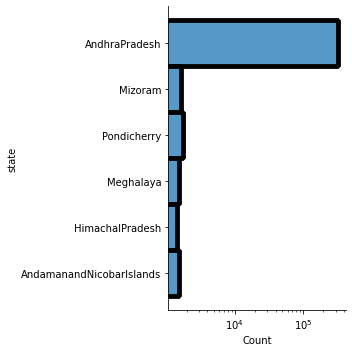

In [130]:
import seaborn as sns
sns.displot(Final_EDA, y="state",bins=30,log=True);

In [131]:
topcities=Final_EDA['city'].value_counts().head(10).reset_index()
topcities.columns=['city','usercount']
topcities.head(10)

city  usercount
0  Visakhapatnam     235772
1         Bodhan       1539
2   Sattenapalle       1521
3      PortBlair       1515
4          Kodar       1488
5       Rayadrug       1482
6         Shimla       1409
7     Ramagundam       1331
8      Palwancha       1298
9        Bhongir       1282

<AxesSubplot:title={'center':'Distribution of user across top 10 cities'}, xlabel='city'>

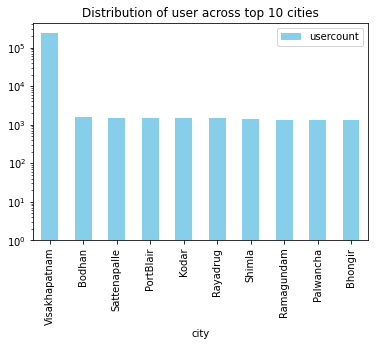

In [132]:
topcities.iloc[:10].plot.bar(x = 'city', y = 'usercount', 
                                 color = 'skyblue', log = True,
                                 title = 'Distribution of user across top 10 cities')

In [133]:
Final_EDA['age_range'].value_counts()

19-25       95497
26-30       92891
31-35       52032
41-50       32688
36-40       31609
Above 51    16543
Below 18     7912
Name: age_range, dtype: int64

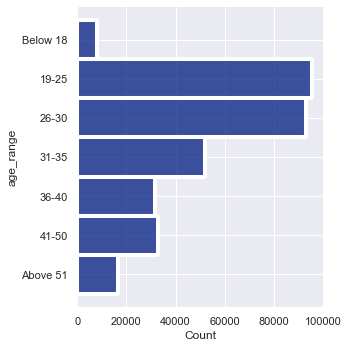

In [134]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("dark"))
sns.displot(Final_EDA, y="age_range",bins=7);

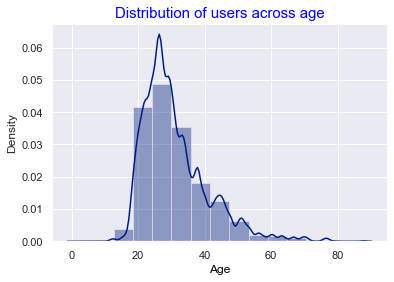

In [135]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("dark"))
sns.distplot([tuple(Final_EDA.age)],bins=15)

plt.xlabel('Age', color='black')
plt.title('Distribution of users across age',color='blue',fontsize=15);

#### Observation: 
19-25 and 26-30 age groups are the top most device users

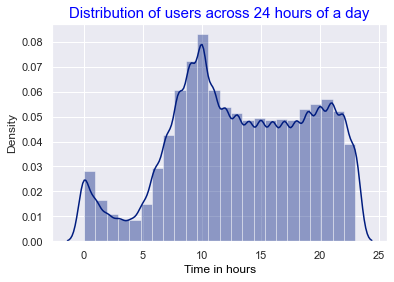

In [136]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("dark"))
sns.distplot([tuple(Final_EDA.Time)],bins=24)

plt.xlabel('Time in hours', color='black')
plt.title('Distribution of users across 24 hours of a day',color='blue',fontsize=15);

#### Observation:
Peak usage hours is between 8-11 AM and is almost even through the rest of the day

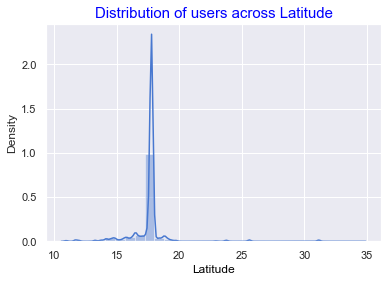

In [137]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(Final_EDA.latitude)],bins=30)

plt.xlabel('Latitude', color='black')
plt.title('Distribution of users across Latitude',color='blue',fontsize=15);

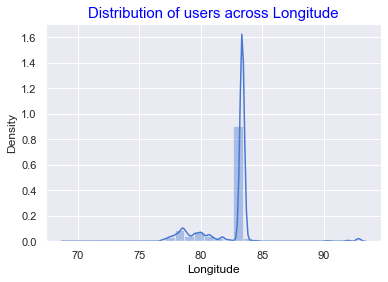

In [138]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(Final_EDA.longitude)],bins=30)

plt.xlabel('Longitude', color='black')
plt.title('Distribution of users across Longitude',color='blue',fontsize=15);

In [139]:
Final_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 329172 entries, 0 to 329171
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_id    329172 non-null  int64         
 1   device_id   329172 non-null  object        
 2   longitude   329172 non-null  float64       
 3   latitude    329172 non-null  float64       
 4   city        329172 non-null  object        
 5   state       329172 non-null  object        
 6   Date_Time   329172 non-null  datetime64[ns]
 7   Day         329172 non-null  object        
 8   Month       329172 non-null  object        
 9   Time        329172 non-null  int64         
 10  gender      329172 non-null  object        
 11  age         329172 non-null  int64         
 12  brand       329172 non-null  object        
 13  model_name  329172 non-null  object        
 14  age_range   329172 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(2), int6

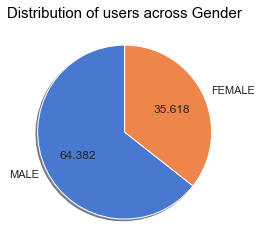

In [140]:
plt.pie(Final_EDA['gender'].value_counts(),startangle=90,autopct='%.3f',
        labels=['MALE','FEMALE'],shadow=True);

plt.title("Distribution of users across Gender",color='black',fontsize=15);

## Unique user analysis

In [142]:
Final_EDA.device_id.nunique()

5223

In [144]:
Unique_user = Final_EDA.drop_duplicates('device_id', keep='first')

In [145]:
Unique_user.shape

(5223, 15)

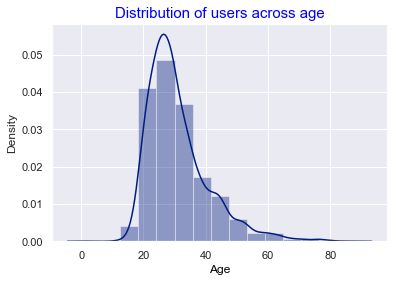

In [146]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("dark"))
sns.distplot([tuple(Unique_user.age)],bins=15)

plt.xlabel('Age', color='black')
plt.title('Distribution of users across age',color='blue',fontsize=15);

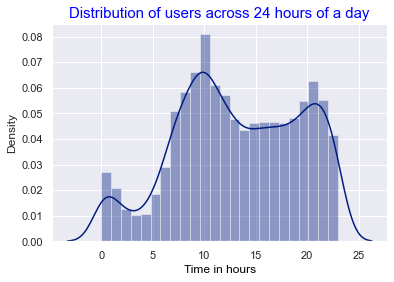

In [147]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("dark"))
sns.distplot([tuple(Unique_user.Time)],bins=24)

plt.xlabel('Time in hours', color='black')
plt.title('Distribution of users across 24 hours of a day',color='blue',fontsize=15);

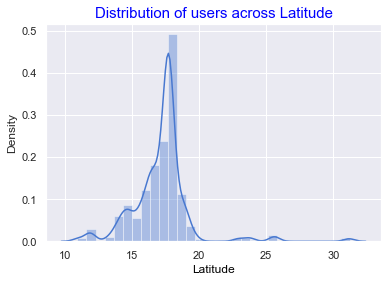

In [148]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(Unique_user.latitude)],bins=30)

plt.xlabel('Latitude', color='black')
plt.title('Distribution of users across Latitude',color='blue',fontsize=15);

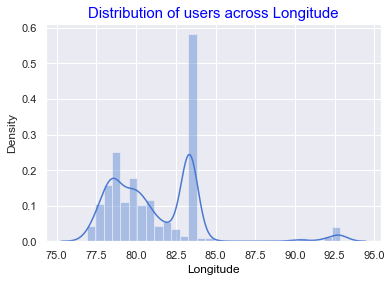

In [149]:
sns.set(color_codes=True)                                               
sns.set_palette(sns.color_palette("muted"))
sns.distplot([tuple(Unique_user.longitude)],bins=30)

plt.xlabel('Longitude', color='black')
plt.title('Distribution of users across Longitude',color='blue',fontsize=15);

#### Distribution of users across city

In [150]:
topcities_unique=Unique_user['city'].value_counts().head(10).reset_index()
topcities_unique.columns=['city','usercount']
topcities_unique.head(10)

city  usercount
0    Visakhapatnam       1547
1         Samalkot         46
2  LalbahadurNagar         43
3     Qutubullapur         43
4           Nuzvid         42
5        Palwancha         42
6        Narasapur         42
7        Proddatur         41
8        PortBlair         41
9          Koratla         40

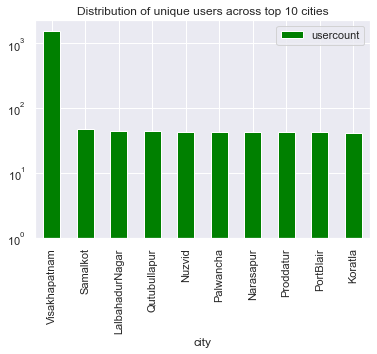

In [151]:
topcities_unique.iloc[:10].plot.bar(x = 'city', y = 'usercount', 
                                 color = 'green', log = True,
                                 title = 'Distribution of unique users across top 10 cities');

#### Distribution of users across gender

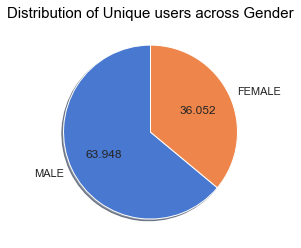

In [152]:
plt.pie(Unique_user['gender'].value_counts(),startangle=90,autopct='%.3f',
        labels=['MALE','FEMALE'],shadow=True);

plt.title("Distribution of Unique users across Gender",color='black',fontsize=15);

#### Distribution of users across States

Text(0.5, 1.0, 'State wise unique events count')

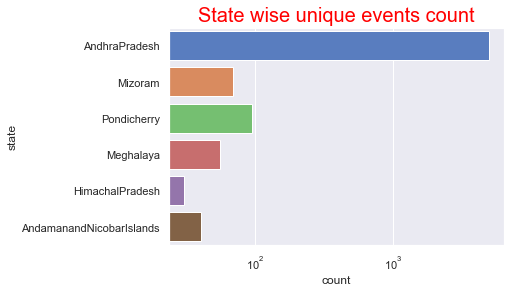

In [155]:
sns.countplot(y='state', data=Unique_user,log=True);
plt.title('State wise unique events count',fontsize=20, color='red')

In [156]:
Unique_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5223 entries, 0 to 329171
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_id    5223 non-null   int64         
 1   device_id   5223 non-null   object        
 2   longitude   5223 non-null   float64       
 3   latitude    5223 non-null   float64       
 4   city        5223 non-null   object        
 5   state       5223 non-null   object        
 6   Date_Time   5223 non-null   datetime64[ns]
 7   Day         5223 non-null   object        
 8   Month       5223 non-null   object        
 9   Time        5223 non-null   int64         
 10  gender      5223 non-null   object        
 11  age         5223 non-null   int64         
 12  brand       5223 non-null   object        
 13  model_name  5223 non-null   object        
 14  age_range   5223 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(8)
mem

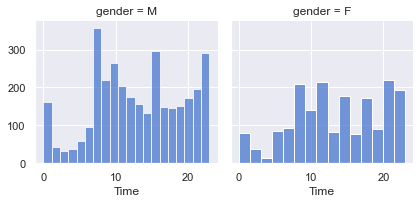

In [166]:
g = sns.FacetGrid(Unique_user, col="gender")
g.map(sns.histplot, "Time");

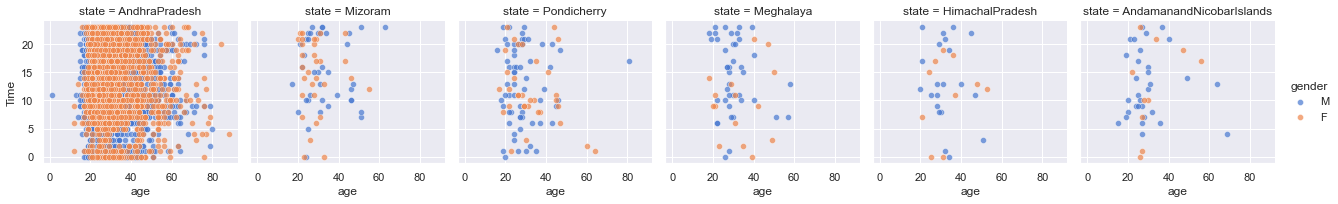

In [168]:
g = sns.FacetGrid(Unique_user, col="state", hue="gender")
g.map(sns.scatterplot, "age", "time", alpha=.7)
g.add_legend()

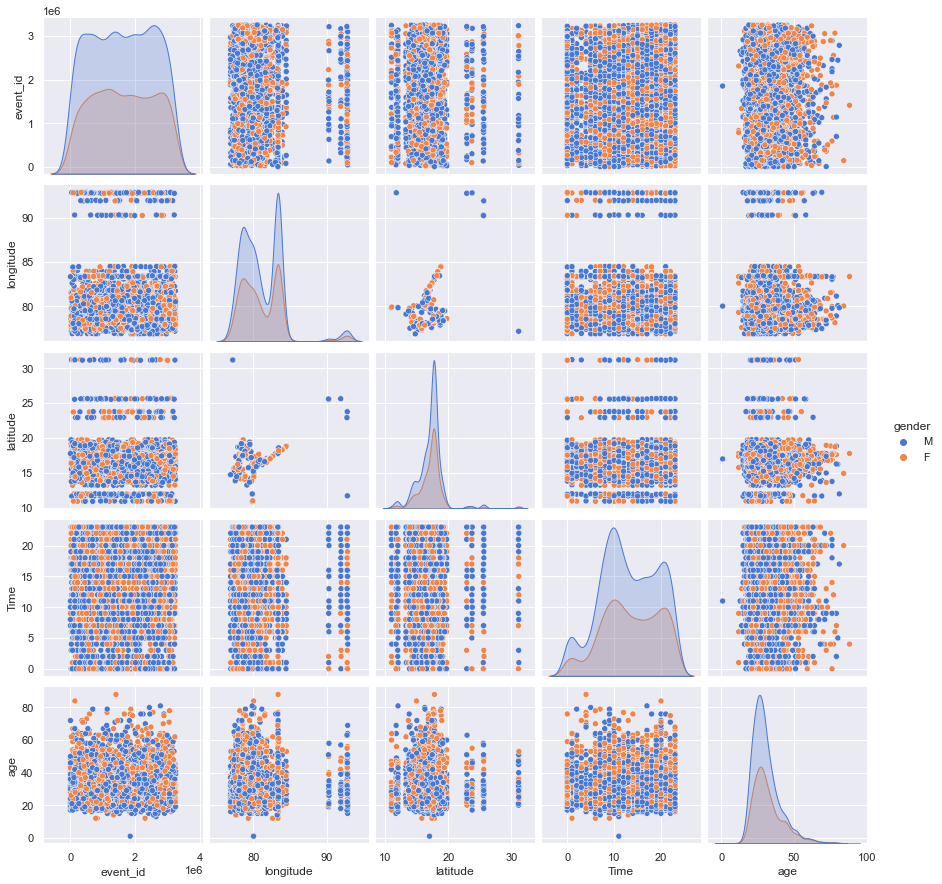

In [172]:
sns.pairplot(Unique_user, hue="gender", height=2.5)

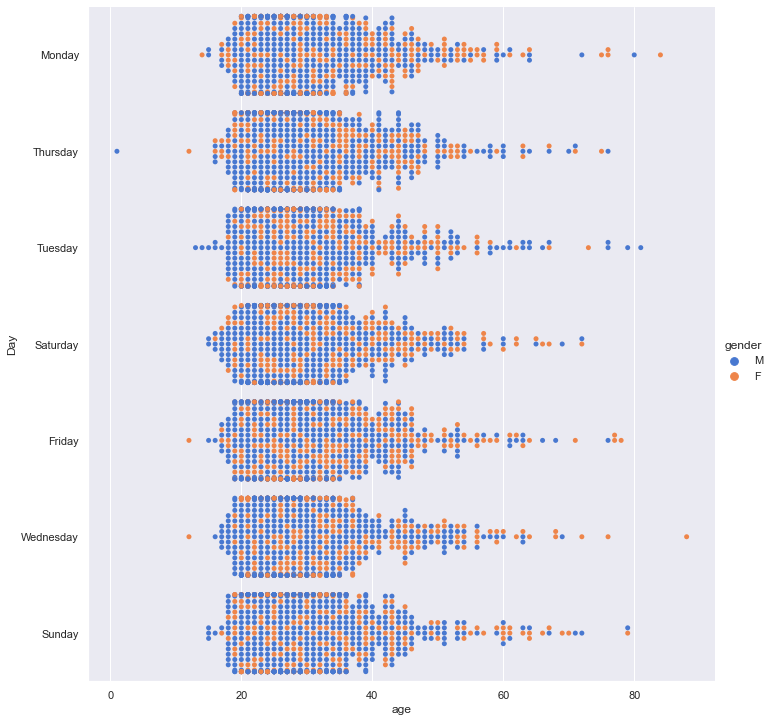

In [173]:
sns.catplot(x="age", y="Day", hue="gender",
            kind="swarm", data=Unique_user,height=10, aspect=1)

In [175]:
Unique_user.Month.value_counts()

May      5220
April       3
Name: Month, dtype: int64

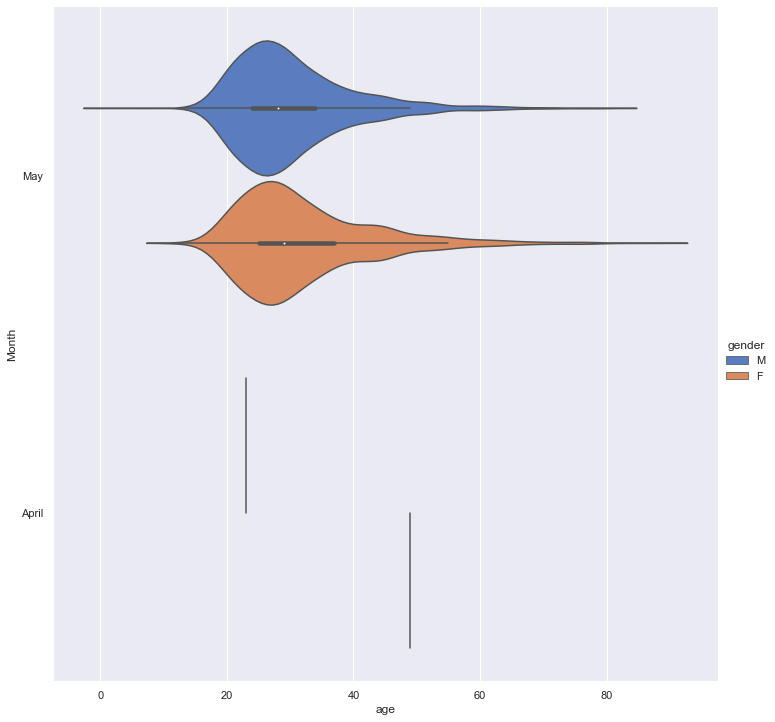

In [177]:
sns.catplot(x="age", y="Month", hue="gender",
            kind="violin", data=Unique_user,height=10, aspect=1)

#### Distribution of users across Gender, Age_range, Time and States

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

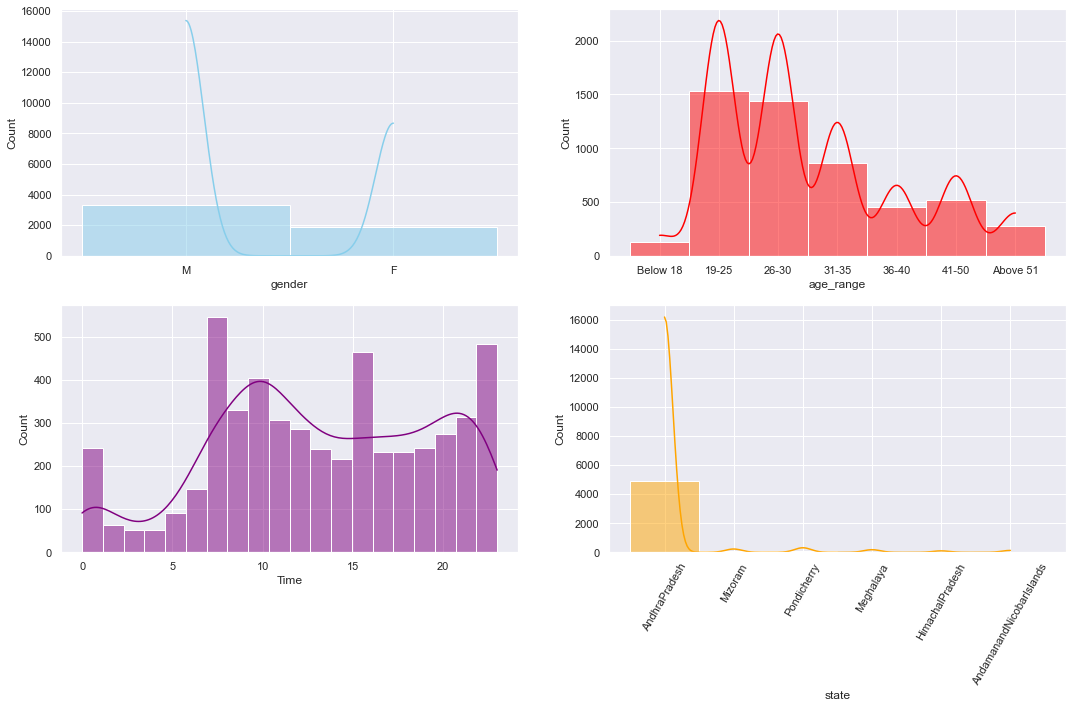

In [214]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(data=Unique_user, x="gender", color="skyblue", label="Gender", kde=True, ax=axs[0, 0]);
sns.histplot(data=Unique_user, x="age_range", color="red", label="Age Range", kde=True, ax=axs[0, 1]);
sns.histplot(data=Unique_user, x="Time", color="purple", label="Time", kde=True, ax=axs[1, 0]);
sns.histplot(data=Unique_user, x="state", color="orange", label="State", kde=True, ax=axs[1, 1]);
plt.xticks(rotation=60)

### Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

In [171]:
Unique_user.brand.unique()

array(['Xiaomi', 'Samsung', 'Huawei', 'Meizu', 'Lenovo', 'Coolpad',
       'vivo', 'Bird', 'OPPO', 'Tianyu', 'Yumi', 'TCL', 'Nubia', 'HTC',
       'Vitu', 'OnePlus', 'Amoi', 'Bai Li Feng', 'Hisense', 'Meitu',
       'BigQ', "Coolby Rubik's Cube", 'Hammer', 'China Mobile', 'LG',
       'Dove', 'LeTV', 'Qiku', 'Extreme Bao', 'Aipel', 'LOGO', 'InFocus',
       'Yougo', 'Oberxin', 'Yuxin', 'Motorola', 'Little Poplar',
       'Lingyun', 'Mengmi', 'ZUK', 'Bairfeng', 'Orlandi', 'Konka',
       'Fresh Rice', 'Google', 'Nokia', 'Ouxin', 'Cubbie', 'Black Rice',
       'Ox', 'Pnair', 'Wopfung', 'Ouqi', 'Green Orange', 'Aiyouni',
       'Guangxin', 'Newman', 'Baojiexun', 'Bajia', 'Candy Gourd', 'Simi',
       'Copper', 'Haier', 'Banghua', 'ASUS', 'Xiangmi', 'Mi Song',
       'Noah Xin', 'Weimi'], dtype=object)

In [178]:
topbrands_unique=Unique_user['brand'].value_counts().head(10).reset_index()
topbrands_unique.columns=['brand','usercount']
topbrands_unique.head(10)

brand  usercount
0   Xiaomi       1279
1  Samsung       1165
2   Huawei        861
3     vivo        482
4     OPPO        417
5    Meizu        320
6  Coolpad        234
7      HTC         71
8   Lenovo         67
9     LeTV         34

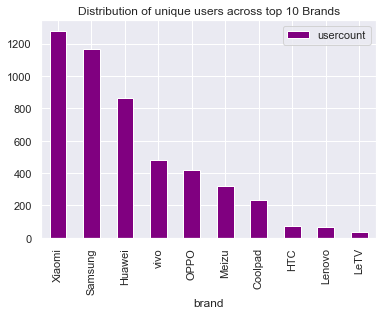

In [181]:
topbrands_unique.iloc[:10].plot.bar(x = 'brand', y = 'usercount', 
                                 color = 'purple', 
                                 title = 'Distribution of unique users across top 10 Brands');

In [417]:
topmodels_unique=Unique_user['model_name'].value_counts().head(10).reset_index()
topmodels_unique.columns=['Model','usercount']
topmodels_unique.head(10)

Model  usercount
0      Redmi note        218
1           MI 2S        176
2            MI 3        172
3   Galaxy Note 3        167
4            MI 4        125
5  Galaxy Note 2         111
6       Galaxy S4        110
7         Honor 6         87
8        Honor 3C         86
9        Redmi 1S         85

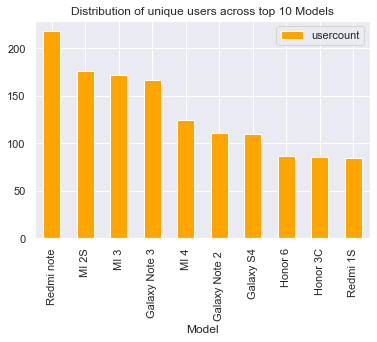

In [419]:
topmodels_unique.iloc[:10].plot.bar(x = 'Model', y = 'usercount', 
                                 color = 'orange', 
                                 title = 'Distribution of unique users across top 10 Models');

### Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

In [217]:
topbrands_unique

brand  usercount
0   Xiaomi       1279
1  Samsung       1165
2   Huawei        861
3     vivo        482
4     OPPO        417
5    Meizu        320
6  Coolpad        234
7      HTC         71
8   Lenovo         67
9     LeTV         34

In [220]:
top10brands = topbrands_unique['brand'].values.tolist()
print(top10brands)

['Xiaomi', 'Samsung', 'Huawei', 'vivo', 'OPPO', 'Meizu', 'Coolpad', 'HTC', 'Lenovo', 'LeTV']


In [221]:
topbrand = Unique_user[Unique_user['brand'].isin(top10brands)].copy()
topbrand.head(10)

event_id             device_id  longitude   latitude           city  \
0      1078723   -512424213979236423  83.398244  17.768149  Visakhapatnam   
82      280014  -8879643774076165575  78.155397  16.390327       Wanparti   
106    2334601   -601883305299256779  83.380111  17.828583  Visakhapatnam   
1061   2064864  -2764520535330416860  83.315014  17.825280  Visakhapatnam   
1289   1341801   4986891477794016217  83.324339  17.778384  Visakhapatnam   
1655   2463530   8986178529983322937  83.322091  17.816629  Visakhapatnam   
1922    194918   1781207162246898691  77.316879  15.653540          Adoni   
2081   1887410  -7977473090891298873  83.362778  17.787347  Visakhapatnam   
2235   2483170   -626489962741092037  77.943884  18.670855         Bodhan   
2271   2337029   1769320069082027851  83.381146  17.744599  Visakhapatnam   

              state           Date_Time       Day Month  Time gender  age  \
0     AndhraPradesh 2016-05-02 02:21:20    Monday   May     2      M   31   
82    AndhraPradesh 2016-05-05 13:06:01  Thursday   May    13      M   34   
106   AndhraPradesh 2016-05-05 11:17:48  Thursday   May    11      M   30   
1061  AndhraPradesh 2016-05-03 23:58:20   Tuesday   May    23      F   27   
1289  AndhraPradesh 2016-05-07 15:24:58  Saturday   May    15      M   43   
1655  AndhraPradesh 2016-05-05 21:23:23  Thursday   May    21      M   31   
1922  AndhraPradesh 2016-05-03 07:34:00   Tuesday   May     7      F   35   
2081  AndhraPradesh 2016-05-06 14:01:53    Friday   May    14      M   24   
2235  AndhraPradesh 2016-05-06 16:30:36    Friday   May    16      F   36   
2271  AndhraPradesh 2016-05-05 12:28:46  Thursday   May    12      M   20   

        brand            model_name age_range  
0      Xiaomi                 MI 2A     31-35  
82    Samsung            Galaxy On7     31-35  
106    Huawei                Mate 7     26-30  
1061    Meizu  Memorial Blue metal      26-30  
1289   Xiaomi            Redmi note     41-50  
1655   Xiaomi                 F103S     31-35  
1922   Lenovo                  N818     31-35  
2081  Samsung             Galaxy S4     19-25  
2235  Samsung         Galaxy Note 3     36-40  
2271  Coolpad                    F2     19-25

In [222]:
topbrand.brand.value_counts()

Xiaomi     1279
Samsung    1165
Huawei      861
vivo        482
OPPO        417
Meizu       320
Coolpad     234
HTC          71
Lenovo       67
LeTV         34
Name: brand, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Below 18'),
  Text(1, 0, '19-25'),
  Text(2, 0, '26-30'),
  Text(3, 0, '31-35'),
  Text(4, 0, '36-40'),
  Text(5, 0, '41-50'),
  Text(6, 0, 'Above 51')])

<Figure size 1296x1296 with 0 Axes>

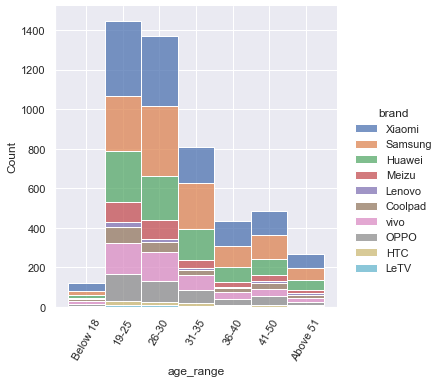

In [254]:
plt.figure(figsize=(18,18))
sns.displot(topbrand, x="age_range", hue="brand", multiple="stack");
plt.xticks(rotation=60)

#### Observation: 
    1. Xiaomi is the most used brand followed by Samsung
    2. Maximum usage is recorded by users across Age group of 19-25 and then 26-30
    3. Below 18 users are very low and promotional events like educational apps can be introduced
    4. Promotional events can also be conducted for maximising the usage for the age group 36-40 
    

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'AndhraPradesh'),
  Text(1, 0, 'Mizoram'),
  Text(2, 0, 'Pondicherry'),
  Text(3, 0, 'Meghalaya'),
  Text(4, 0, 'HimachalPradesh'),
  Text(5, 0, 'AndamanandNicobarIslands')])

<Figure size 1296x1296 with 0 Axes>

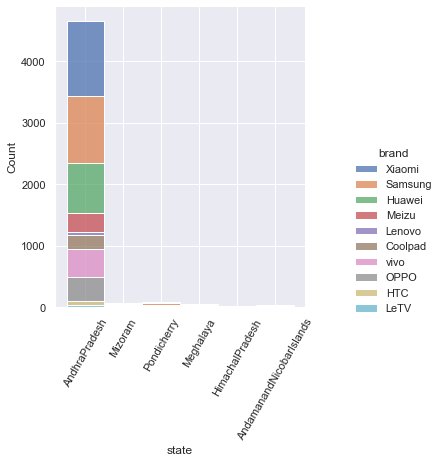

In [253]:
plt.figure(figsize=(18,18))
sns.displot(topbrand, x="state", hue="brand", multiple="stack");
plt.xticks(rotation=60)

#### Observation:
1. Andhra Pradesh records the highest usage of devices 
2. Maximum usage is recorded against Xiaomi and then Samsung
3. Promotional events to be added targetting other states

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

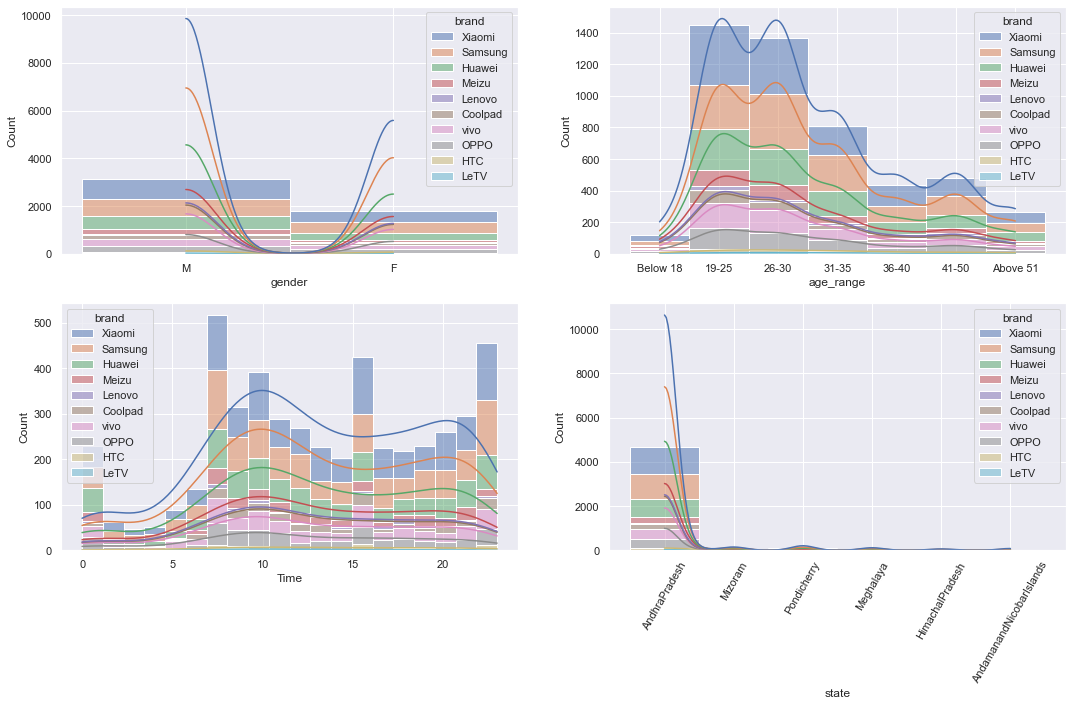

In [413]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(data=topbrand, x="gender", hue="brand", color="skyblue", label="Gender", multiple="stack", kde=True, ax=axs[0, 0]);
sns.histplot(data=topbrand, x="age_range", hue="brand", color="red", label="Age Range", multiple="stack",  kde=True, ax=axs[0, 1]);
sns.histplot(data=topbrand, x="Time", hue="brand", color="purple", label="Time", multiple="stack", kde=True, ax=axs[1, 0]);
sns.histplot(data=topbrand, x="state", hue="brand", color="orange", label="State", multiple="stack", kde=True, ax=axs[1, 1]);
plt.xticks(rotation=60)



#### Observation: Distribution of Brand across age, time, state and age_range
    1. Usage of devices is way higher in Male than Female. Promotional events to target female crowd like retail apps - Amazon, Myntra etc
    2. Maximum usage is recorded by users across Age group of 19-25 and then 26-30. Below 18 users are very low and promotional events like educational apps can be introduced
    3. Peak usage recorded between 7-8 AM followed by 15-16 and 22-23. Usage during the day is uniform
    4. Andhrapradesh has a large number of users compared to all other states

#### Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).



Text(0.5, 1.0, 'AndamanandNicobarIslands')

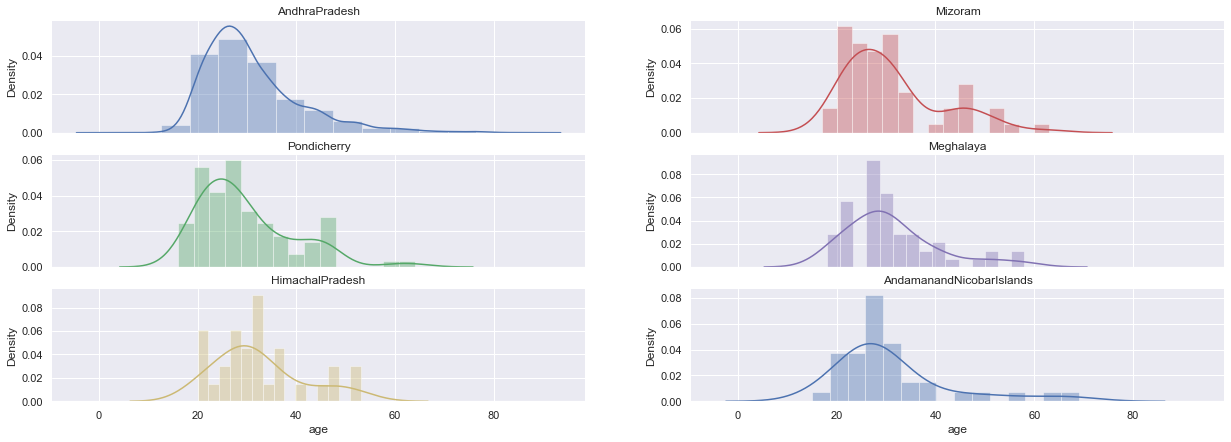

In [284]:
fig, axes = plt.subplots(3, 2, figsize=(21, 7), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(topbrand[topbrand.state=='AndhraPradesh']['age'],bins=15, color="b", ax=axes[0, 0]).set_title("AndhraPradesh")

sns.distplot(topbrand[topbrand.state=='Mizoram']['age'],bins=15, color="r", ax=axes[0, 1]).set_title("Mizoram") 

sns.distplot(topbrand[topbrand.state=='Pondicherry']['age'],bins=15, color="g", ax=axes[1, 0]).set_title("Pondicherry")

sns.distplot(topbrand[topbrand.state=='Meghalaya']['age'],bins=15, color="m", ax=axes[1, 1]).set_title("Meghalaya")

sns.distplot(topbrand[topbrand.state=='HimachalPradesh']['age'],bins=15, color="y", ax=axes[2, 0]).set_title("HimachalPradesh")

sns.distplot(topbrand[topbrand.state=='AndamanandNicobarIslands']['age'],bins=15, color="b", ax=axes[2, 1]).set_title("AndamanandNicobarIslands")

Text(0.5, 1.0, 'AndamanandNicobarIslands')

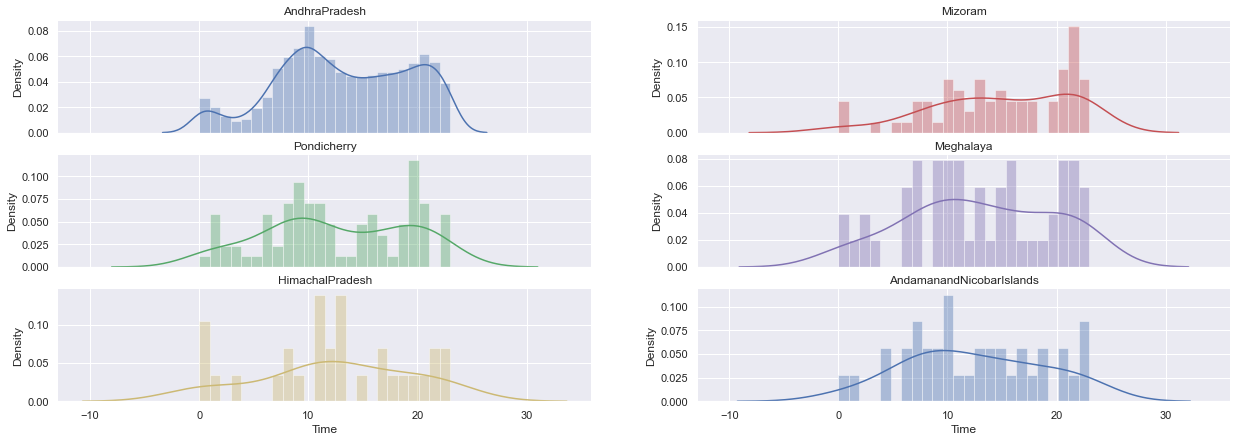

In [289]:
f, axes = plt.subplots(3, 2, figsize=(21, 7), sharex=True)            # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(topbrand[topbrand.state=='AndhraPradesh']['Time'],bins=24, color="b", ax=axes[0, 0]).set_title("AndhraPradesh")

sns.distplot(topbrand[topbrand.state=='Mizoram']['Time'],bins=24, color="r", ax=axes[0, 1]).set_title("Mizoram") 

sns.distplot(topbrand[topbrand.state=='Pondicherry']['Time'],bins=24, color="g", ax=axes[1, 0]).set_title("Pondicherry")

sns.distplot(topbrand[topbrand.state=='Meghalaya']['Time'],bins=24, color="m", ax=axes[1, 1]).set_title("Meghalaya")

sns.distplot(topbrand[topbrand.state=='HimachalPradesh']['Time'],bins=24, color="y", ax=axes[2, 0]).set_title("HimachalPradesh")

sns.distplot(topbrand[topbrand.state=='AndamanandNicobarIslands']['Time'],bins=24, color="b", ax=axes[2, 1]).set_title("AndamanandNicobarIslands")

In [327]:
topstates_cities = topbrand.groupby(['state'])['city'].value_counts()
topstates_cities=pd.DataFrame(topstates_cities)
topstates_cities.columns=['Count']

In [328]:
topstates_cities.head()

Count
state                    city                  
AndamanandNicobarIslands PortBlair           37
AndhraPradesh            Visakhapatnam     1462
                         Samalkot            44
                         LalbahadurNagar     41
                         Koratla             40

In [330]:
topstates_cities.reset_index(inplace=True)
topstates_cities.columns=['State','City','Count']
topstates_cities.head()

State             City  Count
0  AndamanandNicobarIslands        PortBlair     37
1             AndhraPradesh    Visakhapatnam   1462
2             AndhraPradesh         Samalkot     44
3             AndhraPradesh  LalbahadurNagar     41
4             AndhraPradesh          Koratla     40

In [338]:
a1=[]
b1=[]
for i in range(len(topstates_cities)) : 
    a1.append(topstates_cities.loc[i, "City"])  
    b1.append(topstates_cities.loc[i, "Count"])  
print(a1)
print(b1)

['PortBlair', 'Visakhapatnam', 'Samalkot', 'LalbahadurNagar', 'Koratla', 'Narasapur', 'Palwancha', 'Qutubullapur', 'Nandyal', 'Nuzvid', 'Proddatur', 'Bodhan', 'Guntur', 'Anantapur', 'Gudivada', 'Kadiri', 'Kodar', 'Mangalagiri', 'Narasaraopet', 'Nirmal', 'ChinnaChawk', 'Eluru', 'Malkajgiri', 'Ramagundam', 'Serilungampalle', 'Vuyyuru', 'Bobbili', 'Cuddapah', 'Kamareddi', 'Piduguralla', 'Rajamahendri', 'Rayadrug', 'Tadepalle', 'Tadpatri', 'Tandur', 'Yemmiganur', 'Adoni', 'Guntakal', 'Vijayawada', 'Vinukonda', 'Belampalli', 'Kapra', 'Nizamabad', 'Sattenapalle', 'Tanuku', 'Gaddiannaram', 'Hyderabad', 'Karimnagar', 'Nalgonda', 'Adilabad', 'Bapatla', 'Kagaznagar', 'Kavali', 'Machilipatnam', 'Ongole', 'Palakollu', 'Sangareddi', 'Alwal', 'Bhimavaram', 'Dharmavaram', 'Kondukur', 'Kukatpalle', 'Mancheral', 'Siddipet', 'Tuni', 'Bhongir', 'Chittur', 'Gudur', 'Jagtial', 'Ponnur', 'Sirsilla', 'Suriapet', 'Gadwal', 'Patancheru', 'Srikalahasti', 'Tirupati', 'Anakapalle', 'Chilakalurupet', 'Hindupur', '

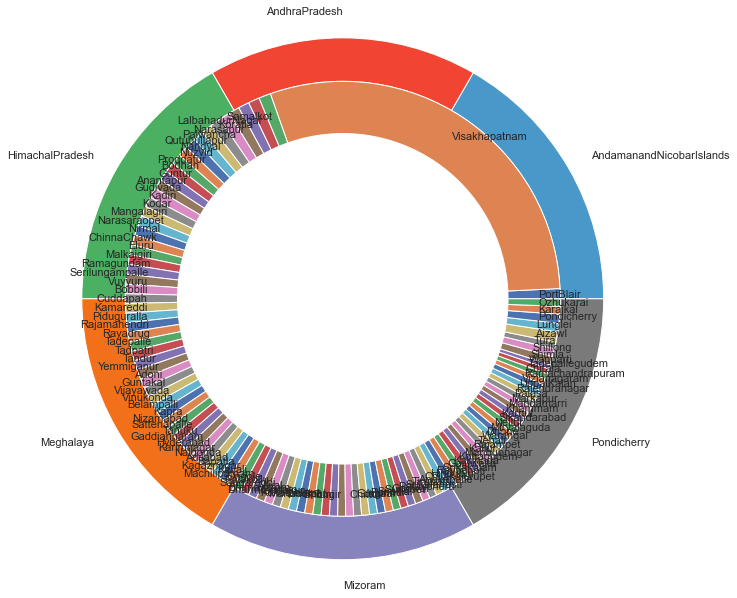

In [346]:
# Libraries
import matplotlib.pyplot as plt
 
# Make data: I have 3 groups and 7 subgroups
group_names=['AndamanandNicobarIslands', 'AndhraPradesh', 'HimachalPradesh','Meghalaya', 'Mizoram', 'Pondicherry']
group_size=[100,100,100,100,100,100]
subgroup_names=a1
subgroup_size=b1
 
# Create colors
a, b, c, d, e, f=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens,plt.cm.Oranges, plt.cm.Purples,plt.cm.Greys]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6), f(0.6)])
plt.setp( mypie, width=0.5, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=3-0.5, labels=subgroup_names, labeldistance=0.9)
plt.setp( mypie2, width=0.6, edgecolor='white')
plt.margins(0,0)
 
# show it
plt.show()

In [348]:
!pip install plotly==4.13.0

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=a8c6880feb0bb02136bec6126227d38fcff547905b384ac76330b0c1ab12d2f8
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [353]:
state={'state':['AndamanandNicobarIslands', 'AndhraPradesh', 'HimachalPradesh','Meghalaya', 'Mizoram', 'Pondicherry'], 
    'state_geo':['Andaman & Nicobar','Andhra Pradesh', 'Himachal Pradesh','Meghalaya', 'Mizoram', 'Puducherry']}
st_df=pd.DataFrame.from_dict(state)
st_df

state          state_geo
0  AndamanandNicobarIslands  Andaman & Nicobar
1             AndhraPradesh     Andhra Pradesh
2           HimachalPradesh   Himachal Pradesh
3                 Meghalaya          Meghalaya
4                   Mizoram            Mizoram
5               Pondicherry         Puducherry

In [354]:
topbrand=pd.merge(topbrand,st_df,how='left',on='state')
topbrand.head()

event_id             device_id  longitude   latitude           city  \
0   1078723   -512424213979236423  83.398244  17.768149  Visakhapatnam   
1    280014  -8879643774076165575  78.155397  16.390327       Wanparti   
2   2334601   -601883305299256779  83.380111  17.828583  Visakhapatnam   
3   2064864  -2764520535330416860  83.315014  17.825280  Visakhapatnam   
4   1341801   4986891477794016217  83.324339  17.778384  Visakhapatnam   

           state           Date_Time       Day Month  Time gender  age  \
0  AndhraPradesh 2016-05-02 02:21:20    Monday   May     2      M   31   
1  AndhraPradesh 2016-05-05 13:06:01  Thursday   May    13      M   34   
2  AndhraPradesh 2016-05-05 11:17:48  Thursday   May    11      M   30   
3  AndhraPradesh 2016-05-03 23:58:20   Tuesday   May    23      F   27   
4  AndhraPradesh 2016-05-07 15:24:58  Saturday   May    15      M   43   

     brand            model_name age_range       state_geo  
0   Xiaomi                 MI 2A     31-35  Andhra Pradesh  
1  Samsung            Galaxy On7     31-35  Andhra Pradesh  
2   Huawei                Mate 7     26-30  Andhra Pradesh  
3    Meizu  Memorial Blue metal      26-30  Andhra Pradesh  
4   Xiaomi            Redmi note     41-50  Andhra Pradesh

In [356]:
st_event=topbrand.pivot_table(index='state_geo',values='device_id',aggfunc='count',)
st_event.reset_index(inplace=True)
st_event

state_geo  device_id
0  Andaman & Nicobar         37
1     Andhra Pradesh       4652
2   Himachal Pradesh         30
3          Meghalaya         53
4            Mizoram         69
5         Puducherry         89

In [357]:
import plotly.express as px
fig = px.choropleth(
    st_event,
    geojson="https://gist.githubusercontent.com/jbrobst/56c13bbbf9d97d187fea01ca62ea5112/raw/e388c4cae20aa53cb5090210a42ebb9b765c0a36/india_states.geojson",
    featureidkey='properties.ST_NM',
    locations='state_geo',
    color='device_id',
    color_continuous_scale='Greens'
)

fig.update_geos(fitbounds="locations", visible=True)

fig.show()


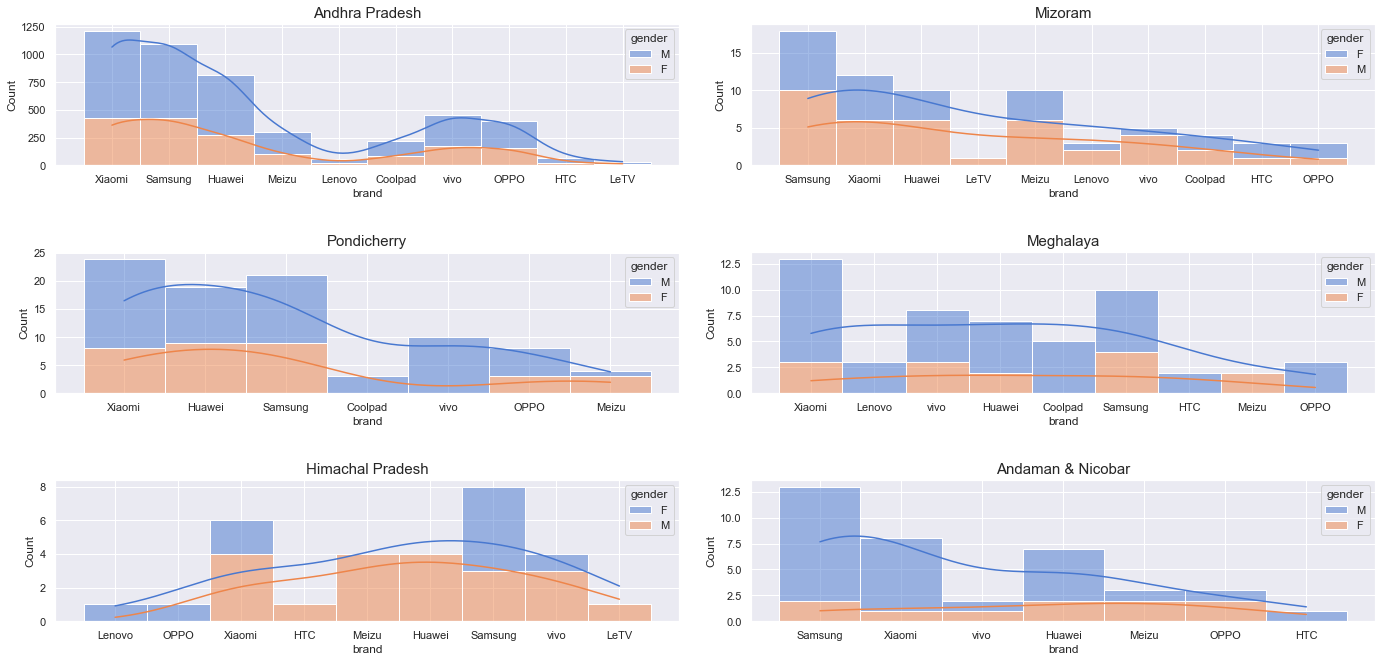

In [440]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
sns.set_palette(sns.color_palette("muted"))

sns.histplot(data=topbrand[topbrand.state=='AndhraPradesh'], x="brand", hue="gender", multiple="stack",kde=True, ax=axs[0, 0]).set_title("Andhra Pradesh", fontsize=15)
sns.histplot(data=topbrand[topbrand.state=='Mizoram'], x="brand", hue="gender", multiple="stack",kde=True, ax=axs[0, 1]).set_title("Mizoram", fontsize=15)
sns.histplot(data=topbrand[topbrand.state=='Pondicherry'], x="brand", hue="gender", multiple="stack",kde=True, ax=axs[1, 0]).set_title("Pondicherry", fontsize=15)
sns.histplot(data=topbrand[topbrand.state=='Meghalaya'], x="brand", hue="gender",multiple="stack", kde=True, ax=axs[1, 1]).set_title("Meghalaya",fontsize=15)
sns.histplot(data=topbrand[topbrand.state=='HimachalPradesh'], x="brand", hue="gender",multiple="stack", kde=True, ax=axs[2, 0]).set_title("Himachal Pradesh",fontsize=15)
sns.histplot(data=topbrand[topbrand.state=='AndamanandNicobarIslands'], x="brand", hue="gender", multiple="stack", kde=True, ax=axs[2, 1]).set_title("Andaman & Nicobar",fontsize=15)
fig.tight_layout(pad=3.0)


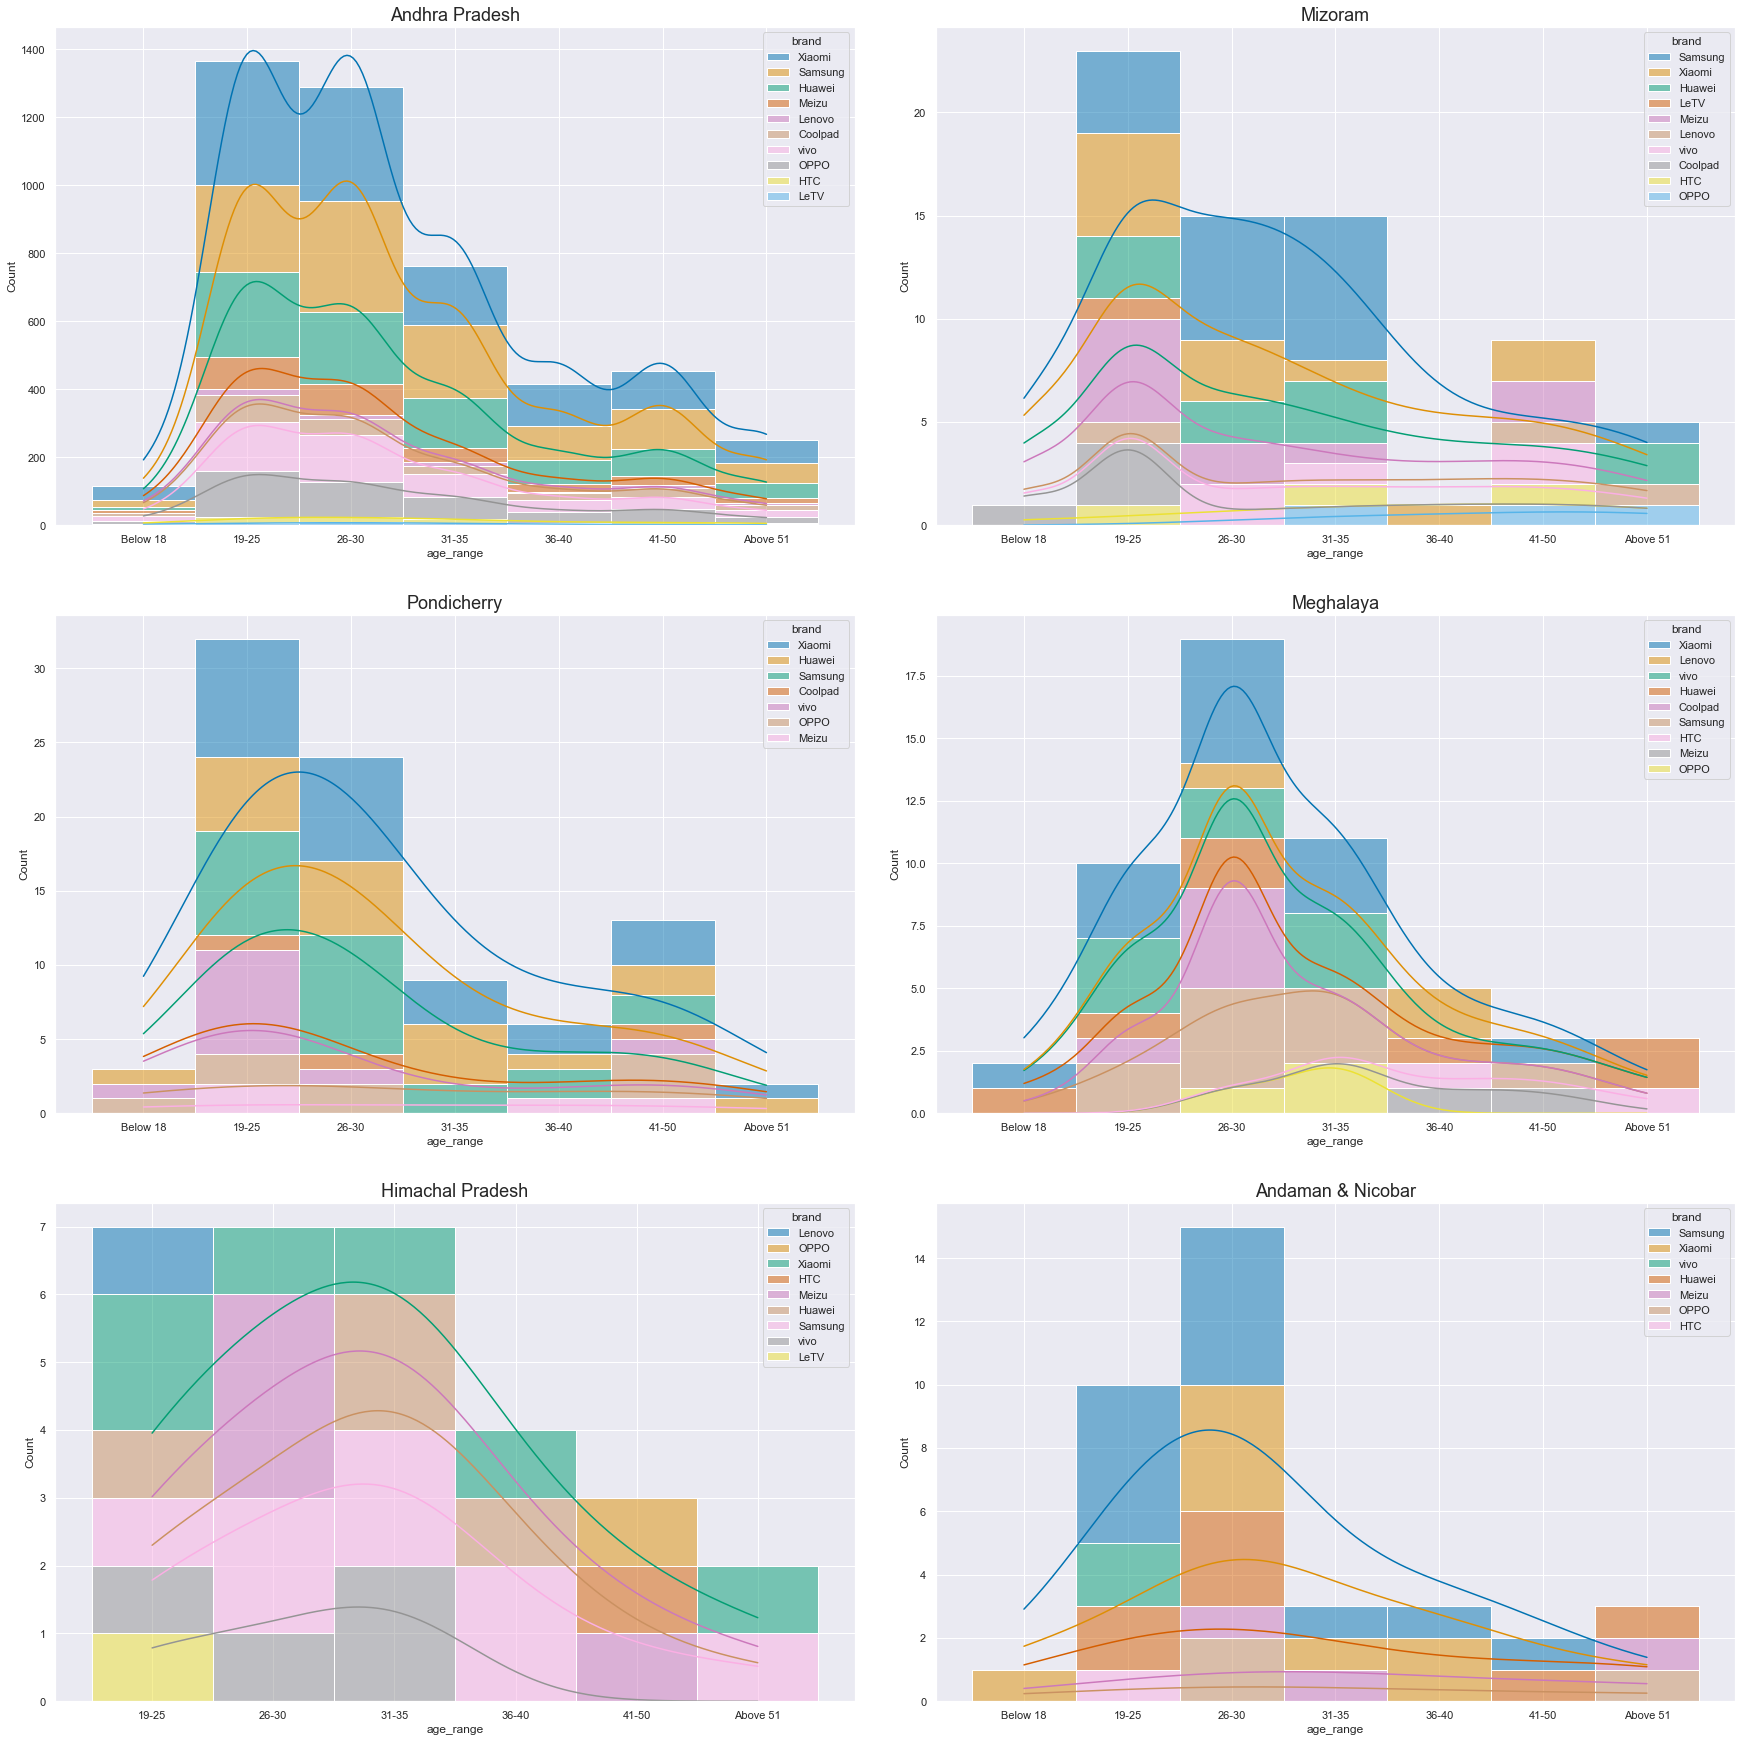

In [442]:
fig, axs = plt.subplots(3, 2, figsize=(25,25))
sns.set_palette(sns.color_palette("colorblind"))

sns.histplot(data=topbrand[topbrand.state=='AndhraPradesh'], x="age_range", hue="brand",multiple="stack", kde=True, ax=axs[0, 0]).set_title("Andhra Pradesh",fontsize=18)
sns.histplot(data=topbrand[topbrand.state=='Mizoram'], x="age_range", hue="brand",multiple="stack", kde=True, ax=axs[0, 1]).set_title("Mizoram",fontsize=18)
sns.histplot(data=topbrand[topbrand.state=='Pondicherry'], x="age_range", hue="brand", multiple="stack",kde=True, ax=axs[1, 0]).set_title("Pondicherry",fontsize=18)
sns.histplot(data=topbrand[topbrand.state=='Meghalaya'], x="age_range", hue="brand", multiple="stack",kde=True, ax=axs[1, 1]).set_title("Meghalaya",fontsize=18)
sns.histplot(data=topbrand[topbrand.state=='HimachalPradesh'], x="age_range", hue="brand", multiple="stack", kde=True, ax=axs[2, 0]).set_title("Himachal Pradesh",fontsize=18)
sns.histplot(data=topbrand[topbrand.state=='AndamanandNicobarIslands'], x="age_range", hue="brand", multiple="stack",kde=True, ax=axs[2, 1]).set_title("Andaman & Nicobar",fontsize=18)
fig.tight_layout(pad=3.0)


In [428]:
top10models = topmodels_unique['Model'].values.tolist()
print(top10models)

[' Redmi note', 'MI 2S', 'MI 3', 'Galaxy Note 3', 'MI 4', 'Galaxy Note 2 ', 'Galaxy S4', 'Honor 6', 'Honor 3C', 'Redmi 1S']


In [429]:
topmodel = topbrand[topbrand['model_name'].isin(top10models)].copy()
topmodel.head(10)

event_id             device_id  longitude   latitude           city  \
4    1341801   4986891477794016217  83.324339  17.778384  Visakhapatnam   
7    1887410  -7977473090891298873  83.362778  17.787347  Visakhapatnam   
8    2483170   -626489962741092037  77.943884  18.670855         Bodhan   
11    765506  -6949468384216342667  83.351888  17.822039  Visakhapatnam   
14   2932117  -4354677482634652577  80.227295  16.469873   Sattenapalle   
18    736917  -1894729467160900829  83.399495  17.797765  Visakhapatnam   
20   1537406   7724502999350752746  80.229415  17.296964        Khammam   
24   2186798   -719230847871958267  81.184379  16.252605  Machilipatnam   
32     88486   7935571561455660329  83.396163  17.823105  Visakhapatnam   
34    327022  -5951103928443221208  83.335456  17.787976  Visakhapatnam   

            state           Date_Time        Day Month  Time gender  age  \
4   AndhraPradesh 2016-05-07 15:24:58   Saturday   May    15      M   43   
7   AndhraPradesh 2016-05-06 14:01:53     Friday   May    14      M   24   
8   AndhraPradesh 2016-05-06 16:30:36     Friday   May    16      F   36   
11  AndhraPradesh 2016-05-06 10:07:24     Friday   May    10      F   43   
14  AndhraPradesh 2016-05-01 06:52:40     Sunday   May     6      M   22   
18  AndhraPradesh 2016-05-03 14:30:27    Tuesday   May    14      M   21   
20  AndhraPradesh 2016-05-04 11:01:47  Wednesday   May    11      M   23   
24  AndhraPradesh 2016-05-07 14:00:49   Saturday   May    14      M   25   
32  AndhraPradesh 2016-05-06 14:50:27     Friday   May    14      M   30   
34  AndhraPradesh 2016-05-07 02:06:33   Saturday   May     2      M   21   

      brand      model_name age_range       state_geo  
4    Xiaomi      Redmi note     41-50  Andhra Pradesh  
7   Samsung       Galaxy S4     19-25  Andhra Pradesh  
8   Samsung   Galaxy Note 3     36-40  Andhra Pradesh  
11  Samsung  Galaxy Note 2      41-50  Andhra Pradesh  
14   Xiaomi      Redmi note     19-25  Andhra Pradesh  
18   Xiaomi      Redmi note     19-25  Andhra Pradesh  
20  Samsung  Galaxy Note 2      19-25  Andhra Pradesh  
24   Xiaomi           MI 2S     19-25  Andhra Pradesh  
32  Samsung       Galaxy S4     26-30  Andhra Pradesh  
34   Huawei        Honor 3C     19-25  Andhra Pradesh

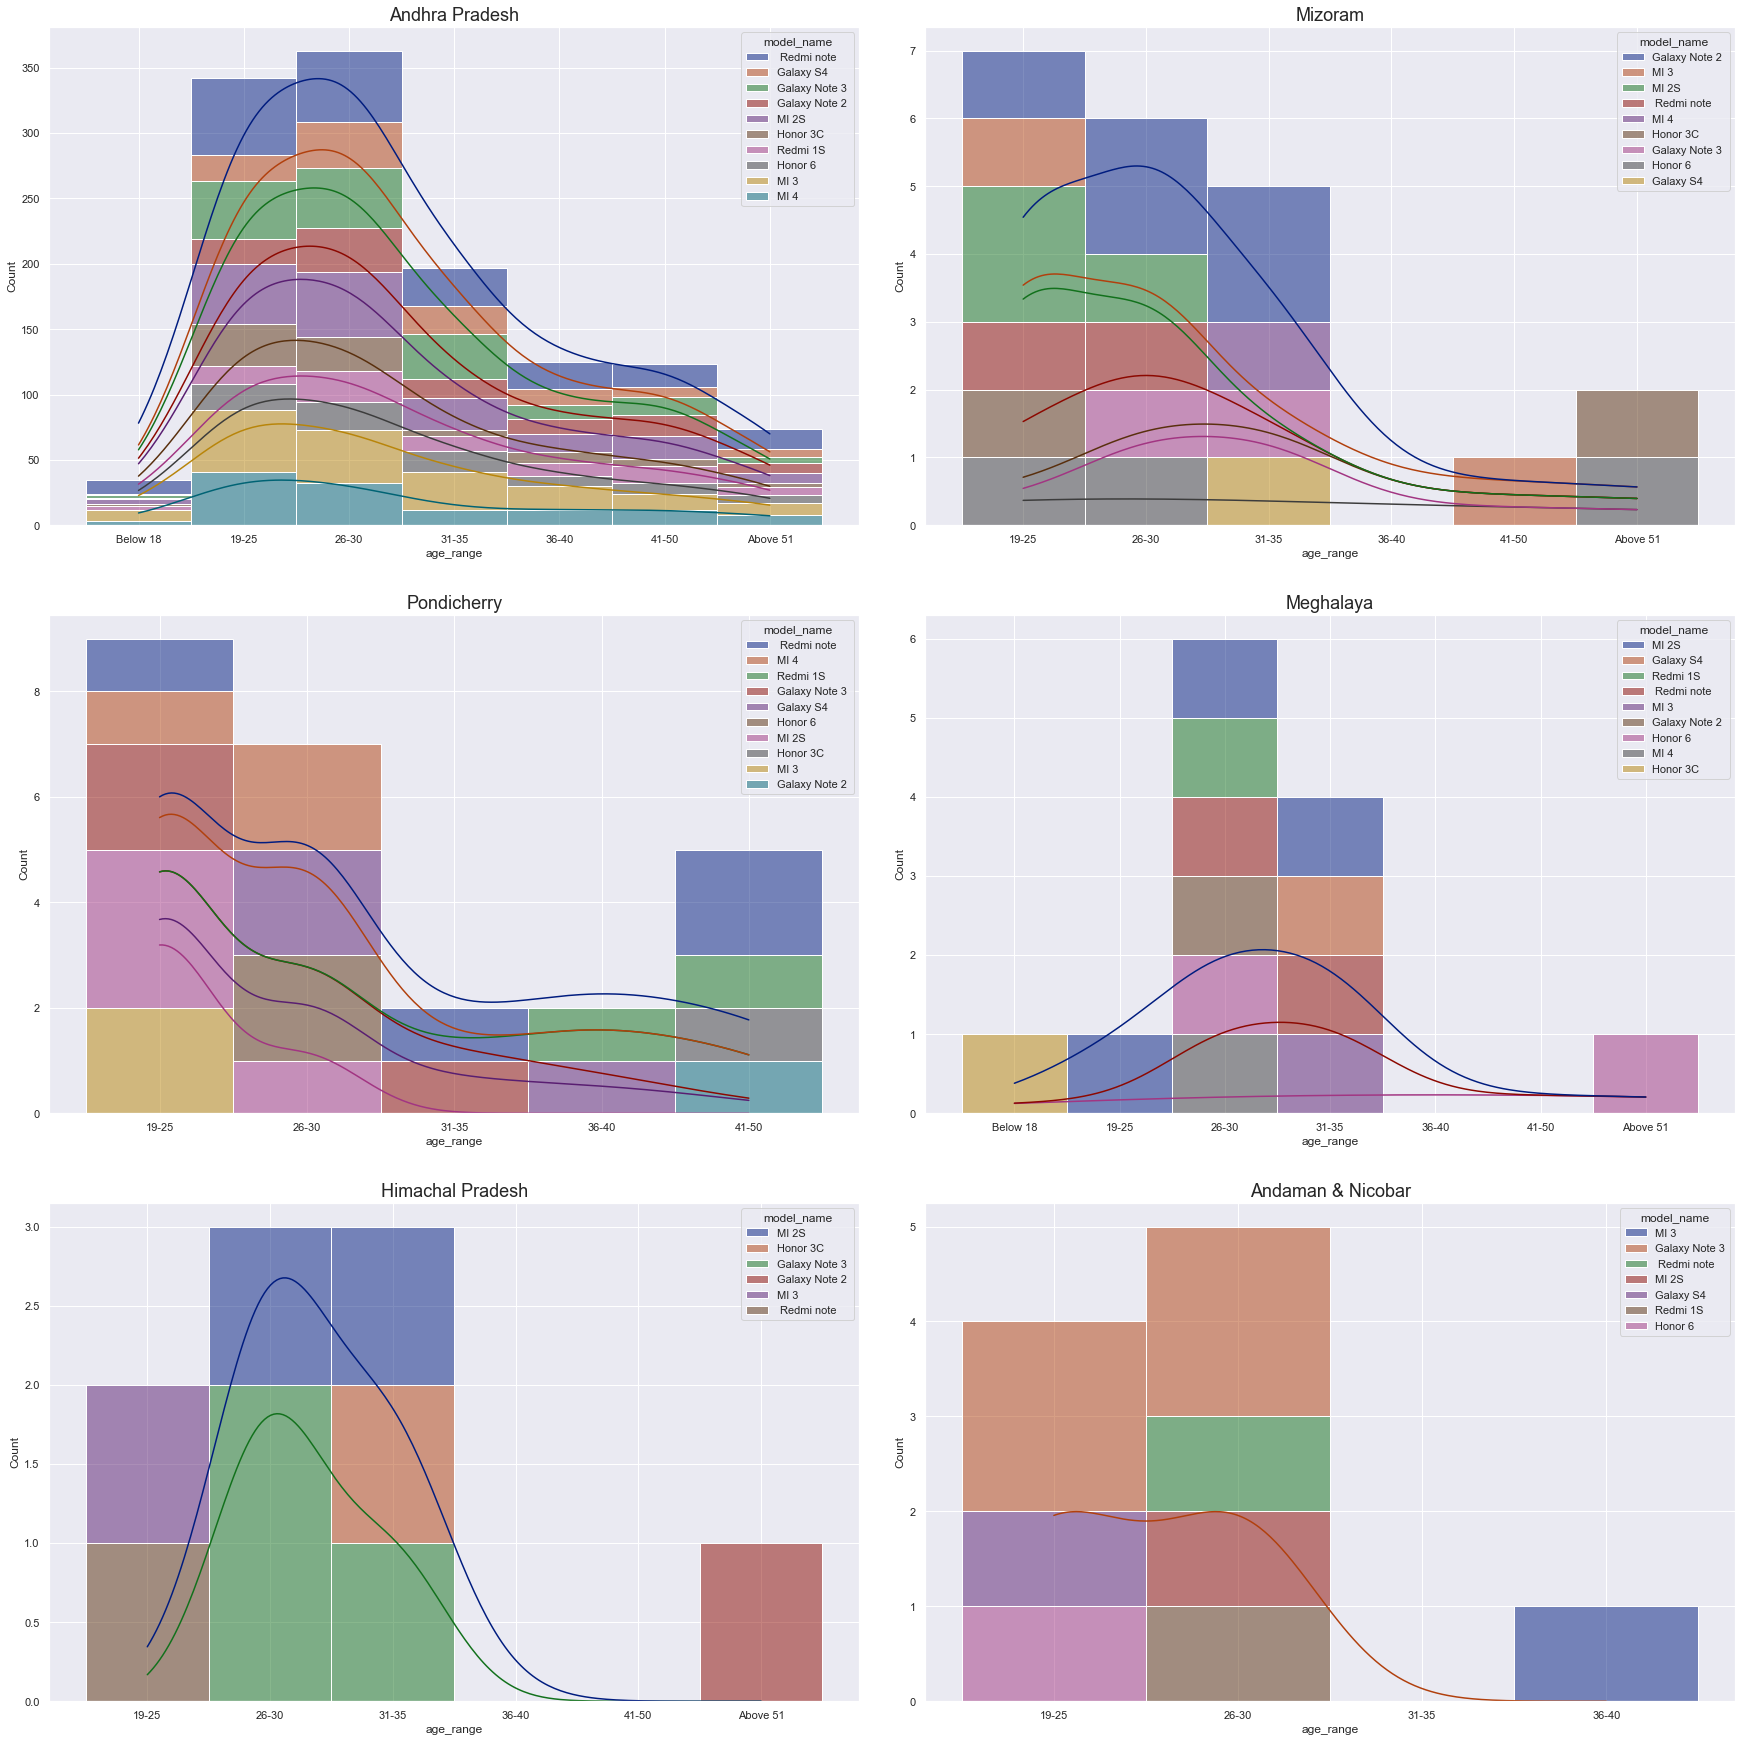

In [434]:
fig, axs = plt.subplots(3, 2, figsize=(25,25))
sns.set_palette(sns.color_palette("dark"))

sns.histplot(data=topmodel[topmodel.state=='AndhraPradesh'], x="age_range", hue="model_name",multiple="stack", kde=True, ax=axs[0, 0]).set_title("Andhra Pradesh",fontsize=18)
sns.histplot(data=topmodel[topmodel.state=='Mizoram'], x="age_range", hue="model_name",multiple="stack", kde=True, ax=axs[0, 1]).set_title("Mizoram",fontsize=18)
sns.histplot(data=topmodel[topmodel.state=='Pondicherry'], x="age_range", hue="model_name", multiple="stack",kde=True, ax=axs[1, 0]).set_title("Pondicherry",fontsize=18)
sns.histplot(data=topmodel[topmodel.state=='Meghalaya'], x="age_range", hue="model_name", multiple="stack",kde=True, ax=axs[1, 1]).set_title("Meghalaya",fontsize=18)
sns.histplot(data=topmodel[topmodel.state=='HimachalPradesh'], x="age_range", hue="model_name", multiple="stack", kde=True, ax=axs[2, 0]).set_title("Himachal Pradesh",fontsize=18)
sns.histplot(data=topmodel[topmodel.state=='AndamanandNicobarIslands'], x="age_range", hue="model_name", multiple="stack",kde=True, ax=axs[2, 1]).set_title("Andaman & Nicobar",fontsize=18)
fig.tight_layout(pad=3.0)
